## Getting the Dataset



In [316]:
import numpy as np
import pandas as pd


stackoverflow_raw_df = pd.read_csv("survey_results_public.csv")

## Data Preparation and Cleaning





In [317]:
stackoverflow_raw_df

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73264,73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN


In [318]:
stackoverflow_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

### Here each column is corresponding to a particular question in the survey. Let us look at what those questions are by looking at the schema file.

In [319]:
schema_fname_df = pd.read_csv("survey_results_schema.csv",index_col="qname")

In [320]:
schema_fname_df

,qid,question,force_resp,type,selector
qname,,,,,
S0,QID16,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
MetaInfo,QID12,Browser Meta Info,False,Meta,Browser
S1,QID1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
MainBranch,QID2,Which of the following options best describes ...,True,MC,SAVR
Employment,QID296,Which of the following best describes your cur...,False,MC,MAVR
...,...,...,...,...,...
Frequency_2,QID290,Interacting with people outside of your immedi...,NaN,MC,MAVR
Frequency_3,QID290,Encountering knowledge silos (where one indivi...,NaN,MC,MAVR
TrueFalse_1,QID294,Are you involved in supporting new hires durin...,NaN,MC,MAVR


### We would like to see all the questions and their qid

In [321]:
pd.set_option("display.max_rows",None) # this will allow us to show all rows 

In [322]:
schema_fname_df

,qid,question,force_resp,type,selector
qname,,,,,
S0,QID16,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
MetaInfo,QID12,Browser Meta Info,False,Meta,Browser
S1,QID1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
MainBranch,QID2,Which of the following options best describes ...,True,MC,SAVR
Employment,QID296,Which of the following best describes your cur...,False,MC,MAVR
RemoteWork,QID308,Which best describes your current work situation?,False,MC,SAVR
CodingActivities,QID297,Which of the following best describes the code...,False,MC,MAVR
S2,QID190,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
EdLevel,QID25,Which of the following best describes the high...,False,MC,SAVR


In [323]:
schema_fname_df.loc['MetaInfo'].question

'Browser Meta Info'

In [324]:
pd.set_option("display.max_rows",10) # make it back to default value as some datasets are really big 

### We only need the question column and not the entire dataframe 


In [325]:
schema_raw_df = pd.read_csv("survey_results_schema.csv",index_col='qname')['question']

In [326]:
schema_raw_df

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object

## Data Preparation and Cleaning

**TODO** -  While the dataset provides us with wealth of knowledge, we will limit ourselves to just a few areas. The areas are :


> - Demography of the respondents.
> - Distribution of programming skills ,experience and preference.
> - Employement related information and opinions

We will start by selecting only those features that will give us the above information.

In [327]:
selected_columns = [ # Demographics
                    "Country","EdLevel","Gender","Sexuality","Ethnicity","Age",

                    # Programming Experience
                    "YearsCode","YearsCodePro","CodingActivities","LanguageHaveWorkedWith","DatabaseHaveWorkedWith","PlatformHaveWorkedWith",

                    # Employement Details
                    "Employment","RemoteWork","DevType","OrgSize","WorkExp","ICorPM"
]

In [328]:
len(selected_columns)

18

In [329]:
survey_df = stackoverflow_raw_df[selected_columns].copy()

In [330]:
survey_df

,Country,EdLevel,Gender,Sexuality,Ethnicity,Age,YearsCode,YearsCodePro,CodingActivities,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,Employment,RemoteWork,DevType,OrgSize,WorkExp,ICorPM
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hobby;Contribute to open-source projects,JavaScript;TypeScript,NaN,NaN,"Employed, full-time",Fully remote,NaN,NaN,NaN,NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Man,Bisexual,White,25-34 years old,14,5,Hobby,C#;C++;HTML/CSS;JavaScript;Python,Microsoft SQL Server,NaN,"Employed, full-time","Hybrid (some remote, some in-person)",Data scientist or machine learning specialist;...,20 to 99 employees,NaN,NaN
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,Straight / Heterosexual,White,35-44 years old,20,17,I don’t code outside of work,C#;JavaScript;SQL;TypeScript,Microsoft SQL Server,NaN,"Employed, full-time",Fully remote,"Developer, full-stack",100 to 499 employees,NaN,NaN
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,NaN,25-34 years old,8,3,Hobby,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,Cloud Firestore;Elasticsearch;Microsoft SQL Se...,Firebase;Microsoft Azure,"Employed, full-time","Hybrid (some remote, some in-person)","Developer, front-end;Developer, full-stack;Dev...",20 to 99 employees,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,Nigeria,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,Straight / Heterosexual,African,25-34 years old,8,5,Freelance/contract work,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Elasticsearch;MySQL;PostgreSQL;Redis,AWS;DigitalOcean;Google Cloud,"Employed, full-time",Fully remote,"Developer, back-end",100 to 499 employees,5.0,Independent contributor
73264,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Man,Straight / Heterosexual,White,25-34 years old,6,5,Hobby,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,Elasticsearch;MongoDB;Oracle;SQLite,NaN,"Employed, full-time",Full in-person,Data scientist or machine learning specialist,I don’t know,6.0,Independent contributor
73265,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,Straight / Heterosexual,Multiracial,55-64 years old,42,33,Hobby;School or academic work,HTML/CSS;JavaScript;PHP;Python;SQL,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Managed Hosting;Microsoft Azure;VMware,"Employed, full-time","Hybrid (some remote, some in-person)","Developer, full-stack;Developer, desktop or en...",20 to 99 employees,42.0,Independent contributor
73266,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,Straight / Heterosexual,European,55-64 years old,50,31,Hobby,C#;Delphi;VBA,Microsoft SQL Server;MongoDB;Oracle,NaN,"Employed, full-time","Hybrid (some remote, some in-person)","Developer, front-end;Developer, desktop or ent...",10 to 19 employees,NaN,NaN


### Notice years code and years code pro are columns that can be numerical so we would like to convert them to numbers.But first let us investigate.

In [331]:
survey_df['YearsCode'].unique()

array([nan, '14', '20', '8', '15', '3', '1', '6', '37', '5', '12', '22',
       '11', '4', '7', '13', '36', '2', '25', '10', '40', '16', '27',
       '24', '19', '9', '17', '18', '26', 'More than 50 years', '29',
       '30', '32', 'Less than 1 year', '48', '45', '38', '39', '28', '23',
       '43', '21', '41', '35', '50', '33', '31', '34', '46', '44', '42',
       '47', '49'], dtype=object)

In [332]:
survey_df['YearsCodePro'].unique()

array([nan, '5', '17', '3', '6', '30', '2', '10', '15', '4', '22', '20',
       '40', '9', '14', '21', '7', '18', '25', '8', '12', '45', '1', '19',
       '28', '24', '11', '23', 'Less than 1 year', '32', '27', '16', '44',
       '26', '37', '46', '13', '31', '39', '34', '38', '35', '29', '42',
       '36', '33', '43', '41', '48', '50', 'More than 50 years', '47',
       '49'], dtype=object)

We will use the pandas to_numeric method to convert the numeric categorical data to numbers. For values that cannot be converted, we pass the "errors = 'coerce' " argument to convert them to nan values

In [333]:
survey_df['YearsCode'] =  pd.to_numeric(survey_df['YearsCode'],errors='coerce')
survey_df['YearsCodePro'] =  pd.to_numeric(survey_df['YearsCodePro'],errors='coerce')


In [334]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   EdLevel                 71571 non-null  object 
 2   Gender                  70853 non-null  object 
 3   Sexuality               66565 non-null  object 
 4   Ethnicity               69474 non-null  object 
 5   Age                     70946 non-null  object 
 6   YearsCode               69746 non-null  float64
 7   YearsCodePro            49820 non-null  float64
 8   CodingActivities        58899 non-null  object 
 9   LanguageHaveWorkedWith  70975 non-null  object 
 10  DatabaseHaveWorkedWith  60121 non-null  object 
 11  PlatformHaveWorkedWith  49924 non-null  object 
 12  Employment              71709 non-null  object 
 13  RemoteWork              58958 non-null  object 
 14  DevType                 61302 non-null

Let us look at some basic statistices of our dataframe

In [335]:
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,69746.000000,49820.000000,36769.000000
mean,12.403951,10.268727,10.242378
std,9.722896,8.576772,8.706850
min,1.000000,1.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,10.000000,8.000000,8.000000
75%,17.000000,15.000000,15.000000
max,50.000000,50.000000,50.000000


The values seem to be normal.

In [336]:
survey_df['Age'].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

We should try to create a new column specifying the category of age as a number. We do so by using the mapped function in pandas that maps the corresponding values in a column to a different one as specified.

In [337]:
mapped_age = {"Under 18 years old" :1 ,"18-24 years old":2, "25-34 years old" : 3 , "35-44 years old":4, "45-54 years old":5,
'55-64 years old': 6,'65 years or older': 7, 'Prefer not to say' : np.nan}

In [338]:
survey_df['Age_Categories'] = survey_df['Age'].map(mapped_age)

What we did here is define categories of ages as follows:
>- Under 18 years old : Category 1 
>- 18-24 years old: Category 2 
>- 25-34 years old :  Category 3  
>- 35-44 years old: Category 4 
>- 45-54 years old: Category 5
>- 55-64 years old: Category  6
>- 65 years or older: Category  7 
We can now drop the orginal 'Age' Column

In [339]:
survey_df.drop(['Age'],axis=1,inplace = True)

Lets do the same for ICorPM column as well.

In [340]:
mapped_icorpm = {"Independent contributor":"IC","People manager":"PM",np.nan : "Miscellenious"}

In [341]:
survey_df["ICorPM"] = survey_df["ICorPM"].map(mapped_icorpm)

In [342]:
survey_df.Gender.value_counts()

Man                                                                               64607
Woman                                                                              3399
Prefer not to say                                                                  1172
Non-binary, genderqueer, or gender non-conforming                                   704
Or, in your own words:                                                              279
                                                                                  ...  
Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming       15
Or, in your own words:;Non-binary, genderqueer, or gender non-conforming             14
Or, in your own words:;Woman                                                         13
Man;Or, in your own words:;Non-binary, genderqueer, or gender non-conforming          9
Man;Or, in your own words:;Woman                                                      2
Name: Gender, Length: 16, dtype:

People who have given multiple gender values, will be ignored in our analysis.

In [343]:
survey_df.loc[survey_df.Gender.str.contains(';' ,na=False)] = np.nan


In [344]:
survey_df.Gender.value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

We should also give sexuality the same treatment as gender.

In [345]:
survey_df.Sexuality.unique()

array([nan, 'Bisexual', 'Straight / Heterosexual',
       'Prefer to self-describe:', 'Bisexual;Straight / Heterosexual',
       'Gay or Lesbian', 'Prefer to self-describe:;Queer',
       'Prefer not to say', 'Queer',
       'Straight / Heterosexual;Prefer to self-describe:',
       'Bisexual;Queer', 'Bisexual;Gay or Lesbian',
       'Gay or Lesbian;Queer',
       'Bisexual;Straight / Heterosexual;Prefer to self-describe:;Queer',
       'Straight / Heterosexual;Queer',
       'Straight / Heterosexual;Prefer to self-describe:;Queer',
       'Bisexual;Straight / Heterosexual;Gay or Lesbian',
       'Bisexual;Straight / Heterosexual;Prefer to self-describe:;Gay or Lesbian;Queer',
       'Bisexual;Straight / Heterosexual;Queer',
       'Bisexual;Prefer to self-describe:;Queer',
       'Bisexual;Gay or Lesbian;Queer',
       'Bisexual;Prefer to self-describe:;Gay or Lesbian',
       'Bisexual;Prefer to self-describe:',
       'Straight / Heterosexual;Gay or Lesbian',
       'Bisexual;Straig

In [346]:
survey_df.loc[survey_df.Sexuality.str.contains(';' ,na=False)] = np.nan


In [347]:
survey_df.Sexuality.unique()

array([nan, 'Bisexual', 'Straight / Heterosexual',
       'Prefer to self-describe:', 'Gay or Lesbian', 'Prefer not to say',
       'Queer'], dtype=object)

In [348]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 69933 non-null  object 
 1   EdLevel                 69734 non-null  object 
 2   Gender                  69017 non-null  object 
 3   Sexuality               64742 non-null  object 
 4   Ethnicity               67660 non-null  object 
 5   YearsCode               67978 non-null  float64
 6   YearsCodePro            48768 non-null  float64
 7   CodingActivities        57520 non-null  object 
 8   LanguageHaveWorkedWith  69158 non-null  object 
 9   DatabaseHaveWorkedWith  58663 non-null  object 
 10  PlatformHaveWorkedWith  48679 non-null  object 
 11  Employment              69876 non-null  object 
 12  RemoteWork              57584 non-null  object 
 13  DevType                 59842 non-null  object 
 14  OrgSize                 49945 non-null

Lets Look at some sample of the dataset after the cleaning.

In [349]:
survey_df.sample(10)

,Country,EdLevel,Gender,Sexuality,Ethnicity,YearsCode,YearsCodePro,CodingActivities,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,Employment,RemoteWork,DevType,OrgSize,WorkExp,ICorPM,Age_Categories
58248,Denmark,"Professional degree (JD, MD, etc.)",Man,Straight / Heterosexual,White;European,10.0,7.0,Hobby,Bash/Shell;Elixir;HTML/CSS;Ruby;SQL,MariaDB;MySQL;PostgreSQL,AWS;DigitalOcean;Linode,"Employed, full-time",Full in-person,"Developer, front-end;Developer, full-stack;Dev...",2 to 9 employees,11.0,IC,3.0
40475,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Man,Straight / Heterosexual,White;European,17.0,12.0,Hobby;School or academic work,C++;Python;Rust;TypeScript,DynamoDB;Elasticsearch;MariaDB;SQLite,AWS;Managed Hosting,"Employed, full-time",Fully remote,"Developer, back-end","1,000 to 4,999 employees",12.0,IC,3.0
43112,Nigeria,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,Straight / Heterosexual,African,4.0,4.0,Hobby;Freelance/contract work,HTML/CSS;JavaScript;PHP;SQL;TypeScript,MongoDB;MySQL,Heroku,"Employed, full-time","Hybrid (some remote, some in-person)","Developer, front-end;Developer, mobile",20 to 99 employees,4.0,IC,2.0
58940,Morocco,"Secondary school (e.g. American high school, G...",Man,Straight / Heterosexual,White;Middle Eastern,9.0,NaN,Hobby;School or academic work,C;C++;HTML/CSS;JavaScript;PHP;SQL,Elasticsearch;MariaDB;MongoDB;MySQL;Redis,Microsoft Azure,"Employed, full-time;Student, part-time",Fully remote,"Developer, back-end",NaN,1.0,IC,2.0
64767,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,Gay or Lesbian,White,17.0,7.0,I don’t code outside of work,Bash/Shell;Python,PostgreSQL,OpenStack,"Employed, full-time",Fully remote,"Developer, back-end","10,000 or more employees",7.0,IC,4.0
65844,Croatia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,Straight / Heterosexual,European,5.0,NaN,NaN,Bash/Shell;C;C++;Python,Oracle,Firebase,"Student, full-time",NaN,NaN,NaN,NaN,Miscellenious,2.0
2218,Austria,"Secondary school (e.g. American high school, G...",Man,NaN,NaN,10.0,8.0,Hobby,Kotlin;Python;SQL;VBA,MariaDB;Microsoft SQL Server,NaN,"Employed, full-time",Full in-person,"Developer, desktop or enterprise applications;...",20 to 99 employees,NaN,Miscellenious,3.0
63471,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,Straight / Heterosexual,"Or, in your own words:",NaN,40.0,Hobby;Contribute to open-source projects;Schoo...,APL;Julia;R,NaN,AWS,"Independent contractor, freelancer, or self-em...","Hybrid (some remote, some in-person)",Academic researcher;Other (please specify):;Se...,2 to 9 employees,43.0,IC,6.0
20087,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,Straight / Heterosexual,White,14.0,9.0,Hobby;Contribute to open-source projects,Bash/Shell;C#;F#;Go;HTML/CSS;JavaScript;PowerS...,MySQL;PostgreSQL,NaN,"Employed, full-time",Fully remote,"Developer, front-end;Developer, full-stack;Dev...",500 to 999 employees,9.0,IC,3.0
59616,Brazil,"Professional degree (JD, MD, etc.)",Man,Straight / Heterosexual,White,36.0,34.0,I don’t code outside of work,Bash/Shell;C#;COBOL;Java;JavaScript;PowerShell...,DynamoDB;IBM DB2;Microsoft SQL Server;MongoDB;...,AWS;Microsoft Azure,"Employed, full-time",Fully remote,"Engineer, site reliability;Developer, back-end...","5,000 to 9,999 employees",36.0,IC,6.0


## Exploratory Analysis and Visualization

 Before we try to ask interesting questions about the StackOverFlow survey, we are going to do some exploratory visualization to find out the demographics  of our survey respondents look like, i.e, their Gender,Country,Sexuality,etc. We need to do so to understand how representative this survey is of the worldwide programming community, as surveys like this tend to have a selection bias.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [350]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Countries

Let us look at some of the countries of our dataset. Using nunique function of the pandas library, we can find the number of countries of our survey.

In [351]:
survey_df.Country.nunique()

180

Since we cannot plot for all the countries, let us loo at teh top 15.

In [352]:
top_countries = survey_df.Country.value_counts().head(15)

In [353]:
top_countries

United States of America                                13003
India                                                    6592
Germany                                                  5244
United Kingdom of Great Britain and Northern Ireland     4061
Canada                                                   2415
                                                        ...  
Italy                                                    1488
Australia                                                1415
Russian Federation                                       1185
Turkey                                                   1006
Sweden                                                    989
Name: Country, Length: 15, dtype: int64

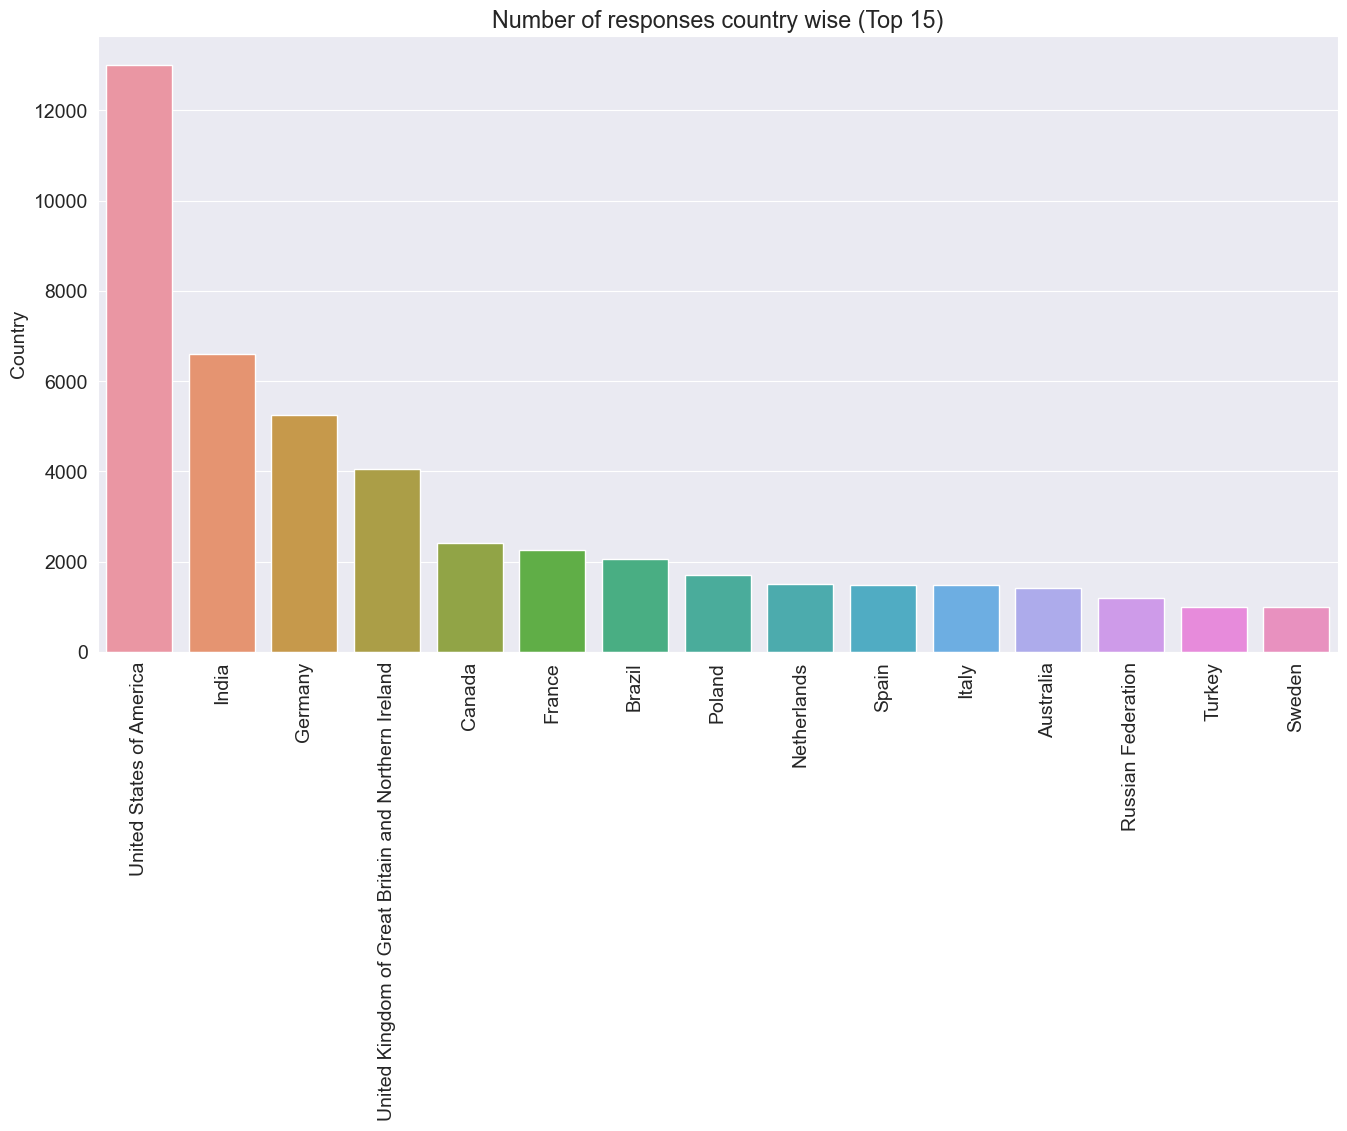

In [354]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Number of responses country wise (Top 15)")
sns.barplot(x = top_countries.index,y = top_countries);

It seems like alot of the responses are mostly from English speaking countries (although Germany is an Notable exception). The combined sum of USA ,India and Germany , at first glance, seem  to outnumber all the other responses combined. India seems to have half of the responses of the USA.

This tells us that this survey is probably not a good representation of the programming community overall, but rather mostly the number of english speaking programmers who use stackoverflow, as the survey was in english.

Let us see if we can differentiate which countries speak english and which don't.

In [355]:
english_countries = ["United Kingdom of Great Britain and Northern Ireland","United States of America","Canada","India","Australia", "South Africa","Pakistan","New Zealand","Belgium","Singapore"]

In [356]:

English_Yes_No = []
for i in survey_df['Country']:
    if i == np.nan:
        English_Yes_No.append(np.nan)
    
    elif i in english_countries:
            English_Yes_No.append("Yes")
            
    else:
            English_Yes_No.append("No")


In [357]:
survey_df['English_Yes_No'] = English_Yes_No

In [358]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 69933 non-null  object 
 1   EdLevel                 69734 non-null  object 
 2   Gender                  69017 non-null  object 
 3   Sexuality               64742 non-null  object 
 4   Ethnicity               67660 non-null  object 
 5   YearsCode               67978 non-null  float64
 6   YearsCodePro            48768 non-null  float64
 7   CodingActivities        57520 non-null  object 
 8   LanguageHaveWorkedWith  69158 non-null  object 
 9   DatabaseHaveWorkedWith  58663 non-null  object 
 10  PlatformHaveWorkedWith  48679 non-null  object 
 11  Employment              69876 non-null  object 
 12  RemoteWork              57584 non-null  object 
 13  DevType                 59842 non-null  object 
 14  OrgSize                 49945 non-null

In [359]:
survey_df.English_Yes_No.value_counts()

No     43340
Yes    29928
Name: English_Yes_No, dtype: int64

The above "No" or "Yes" value should not be taken at face value as the number of entries in "English_Yes_No" column far exceeds that of values in "Countries" column. This means that NaN values are being included as either  "Yes" Column or Column.

Let us see the total Nan values in our column.

In [360]:
survey_df.Country.isnull().sum()

3335

Even if we subtract this value from either values, It is not going to change the fact that over a 3rd of the responses came from the above mentioned countries where English is an official langauge.

Let us plot it.

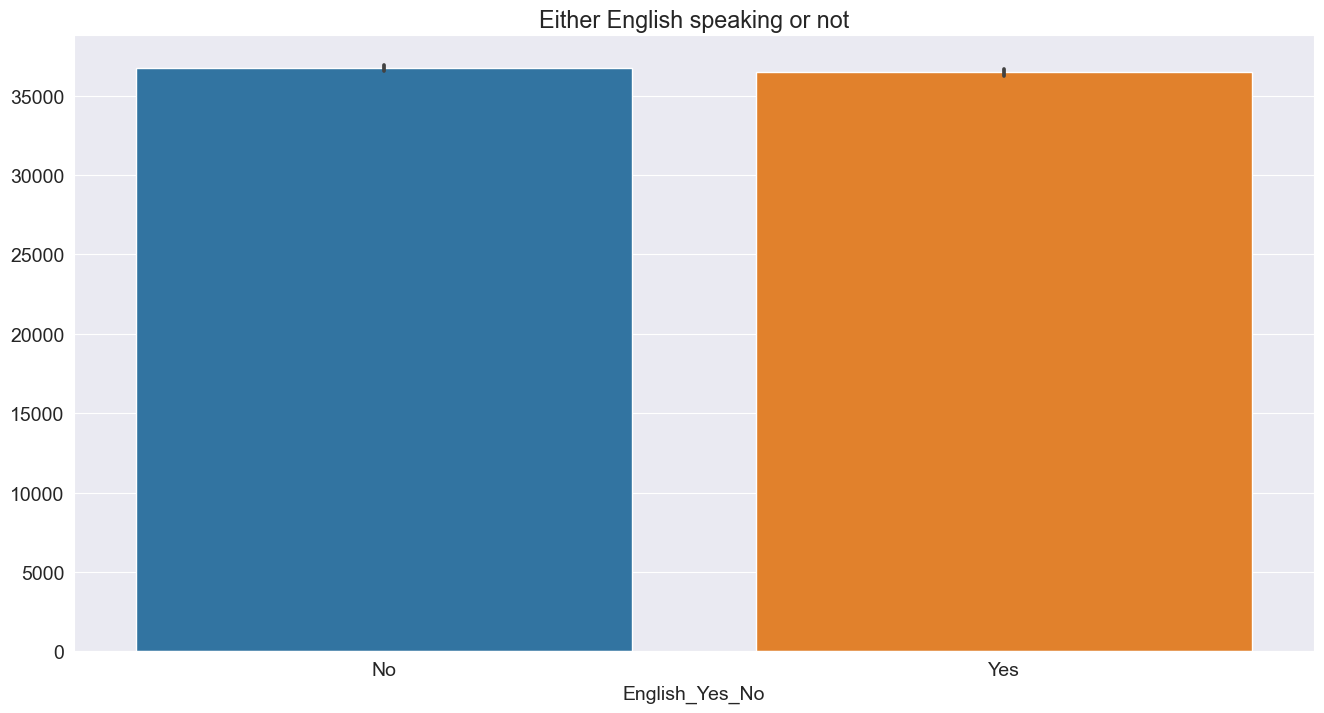

In [361]:
plt.figure(figsize=(16,8))
plt.title("Either English speaking or not")
sns.barplot(y=survey_df.English_Yes_No.index,x = survey_df.English_Yes_No);

# Age

In [362]:
ages = survey_df['Age_Categories']

In [363]:
ages.value_counts()

3.0    27451
2.0    16116
4.0    13672
5.0     5191
1.0     3685
6.0     1955
7.0      541
Name: Age_Categories, dtype: int64

In [364]:
ages_percentage = ages.value_counts(normalize=True) * 100

In [365]:
ages_percentage

3.0    40.009619
2.0    23.488945
4.0    19.926834
5.0     7.565842
1.0     5.370859
6.0     2.849397
7.0     0.788503
Name: Age_Categories, dtype: float64

Remember that we had converted ages to catgories as follows:
>- Under 18 years old : Category 1 
>- 18-24 years old: Category 2 
>- 25-34 years old :  Category 3  
>- 35-44 years old: Category 4 
>- 45-54 years old: Category 5
>- 55-64 years old: Category  6
>- 65 years or older: Category  7 

<AxesSubplot:title={'center':'Age Categories'}, xlabel='Catgories', ylabel='Age_Categories'>

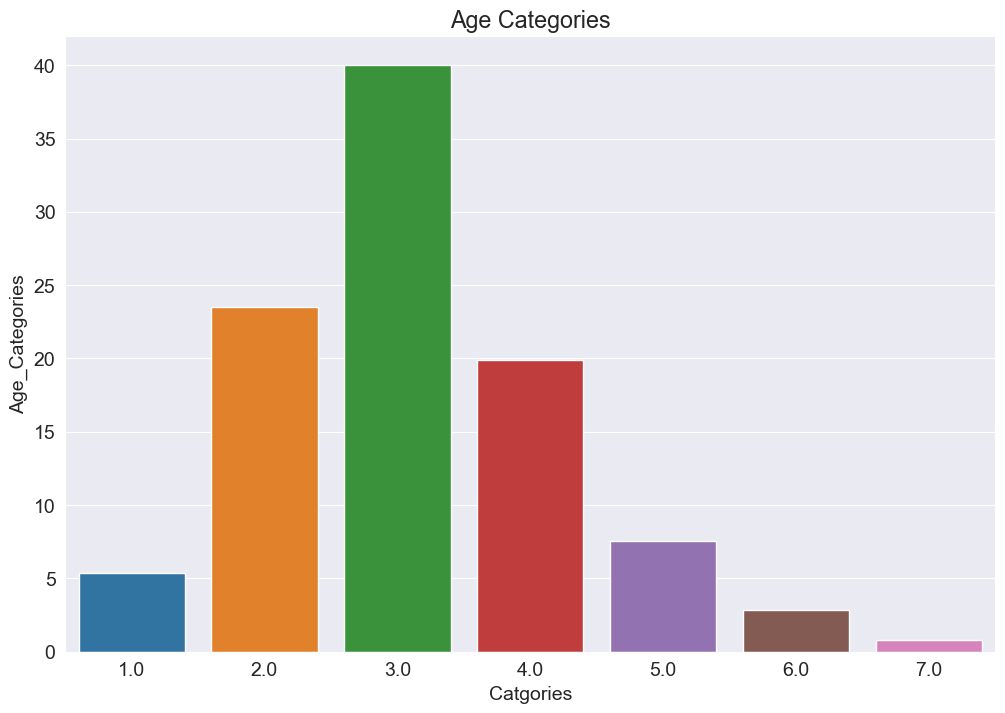

In [366]:
plt.figure(figsize=(12,8))
plt.title("Age Categories")
plt.ylabel("Percentage of Respondents")
plt.xlabel("Catgories")
sns.barplot(x = ages_percentage.index, y = ages_percentage)


Seems that most of the respondents belong to the 25-34 age group(40%), which corresponds to out category 3. Apart from that , there is also a substantial number of users in the 18-24 and 35-44 age groups, with a gradual waning off from there. This seems to comply with the fact that this is an age of Computers. Computers have become an necessity in this modern era and due to the ease of access of getting one , more young people are seen doing coding.

# Gender

It is a well known fact that women and non-binary people are rare and far between in programming, so a skew in data is expected here.

In [367]:
gender_values = survey_df.Gender.value_counts()
gender_values

Man                                                  63840
Woman                                                 3224
Prefer not to say                                     1157
Non-binary, genderqueer, or gender non-conforming      536
Or, in your own words:                                 260
Name: Gender, dtype: int64

A pie chart would help us here to visualize this.

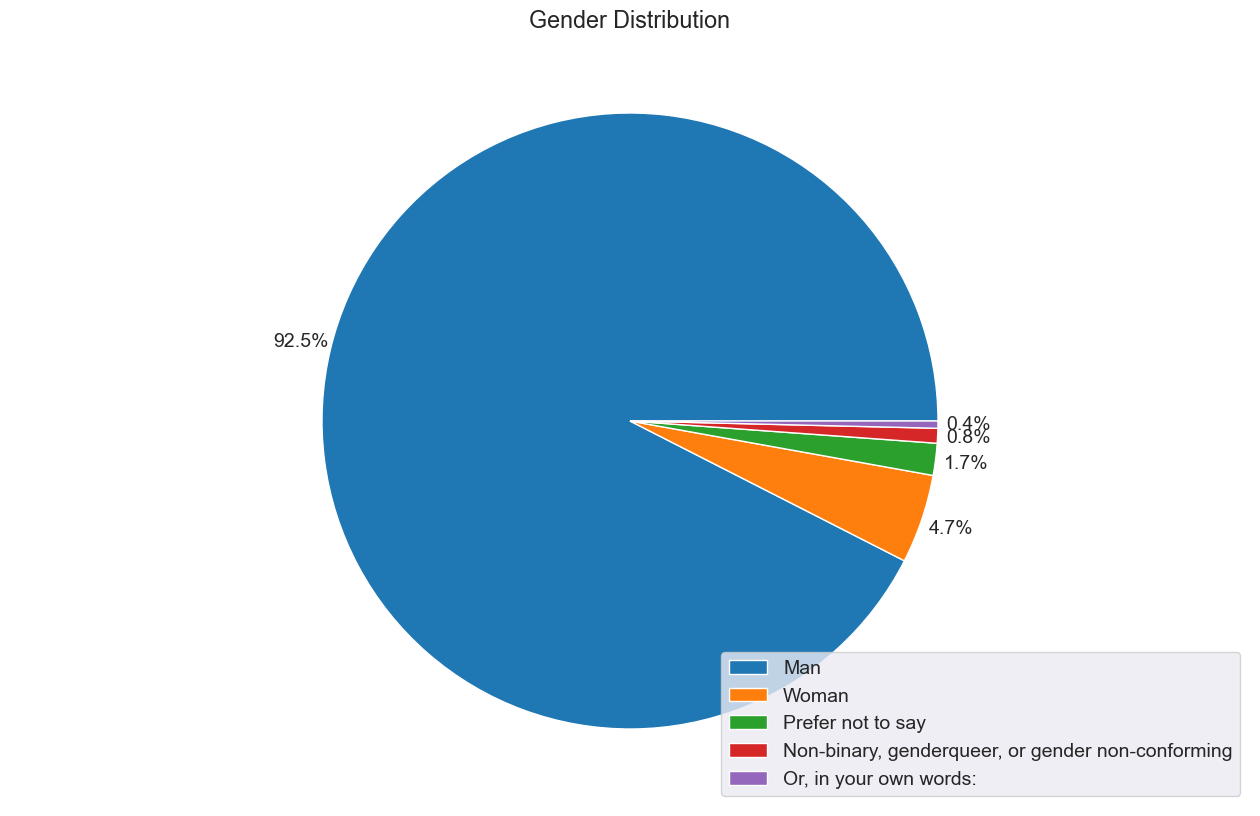

In [368]:
fig = plt.figure(4, figsize=(16,10))
ax = fig.add_subplot(111) 
ax.set_title("Gender Distribution", loc = 'center' )
ax.axis("off")
pie = ax.pie(gender_values, autopct="%1.1f%%",pctdistance=1.1,)
ax2 = fig.add_subplot(212)
ax2.axis("off") 
ax2.legend(pie[0],gender_values.index, loc="lower right")

As we can see, among the people who have answered this question, 92.5% of the respondents were men, while the combined of women and non-binary responses were just 5%. Note that this is lower than the estimates of representation of women and non-binary people in the programming community to be about 12%.

# Education Level

In the past, a formal degree in Computer Science was required to be able to do any sort of work relating to computers. Now, due to the rise of free online resources and cheap internet, let us see if that is still the case.

Let us use horizontal bars for this.

In [369]:
survey_df.EdLevel.unique()

array([nan, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Some college/university study without earning a degree',
       'Something else', 'Primary/elementary school',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)'], dtype=object)

Text(0, 0.5, '')

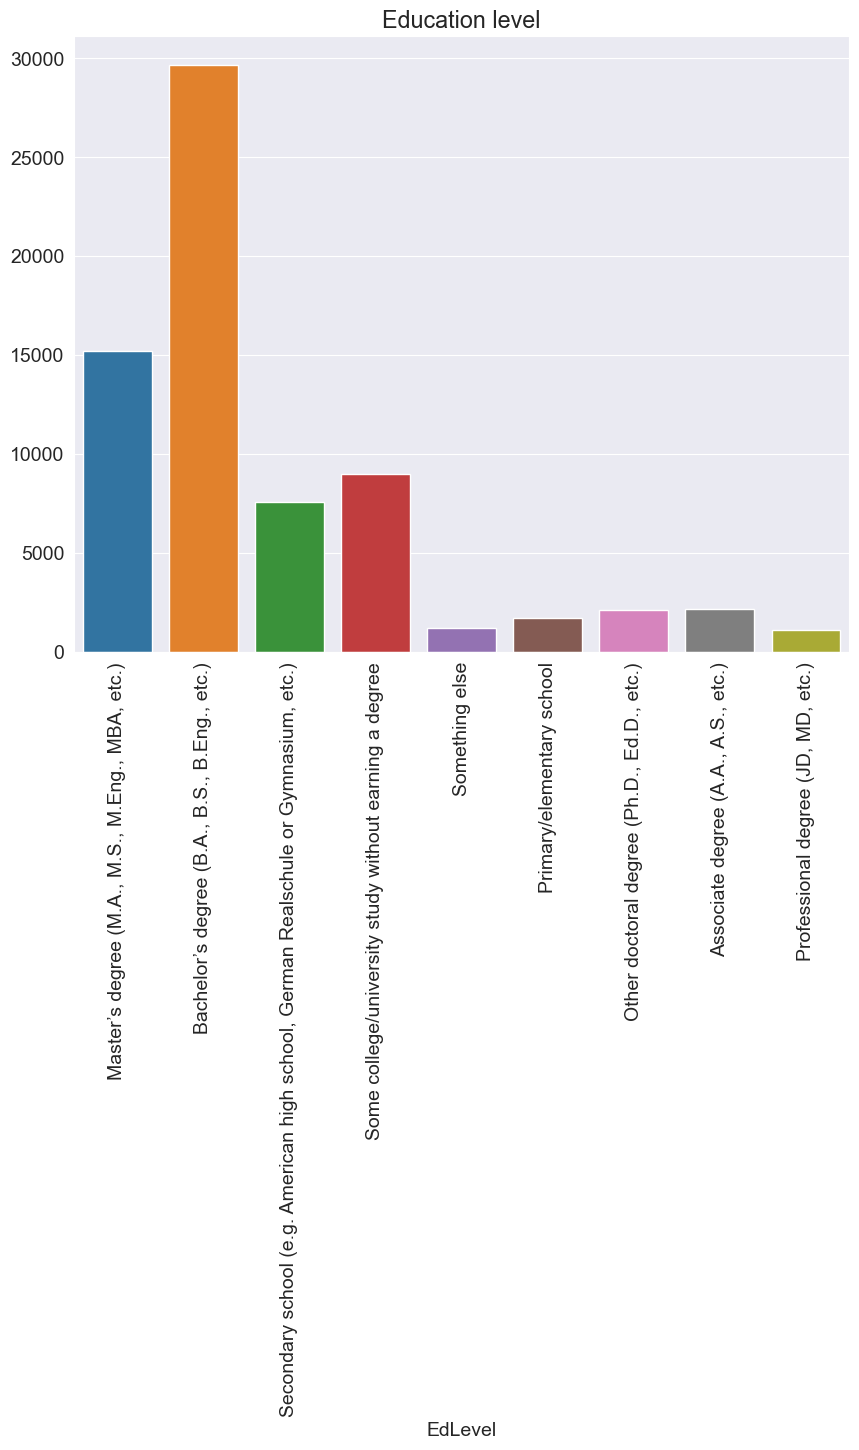

In [370]:
plt.figure(figsize=(10,8))
sns.countplot(x=survey_df.EdLevel)
plt.xticks(rotation = 90)
plt.title("Education level")
plt.ylabel(None)

It seems that over half of the respondents hold either a Bachelors or Masters degree, which indicates that over half of the programmers hold a STEM related college Degree, although whether it was in Computer Science is unclear. This does show that while a degree related to STEM might help, you don't need it to be a programmer.Programming is now almost everywhere, so it doesn't matter in what field a person is in, they will have to learn basic programming sometime in their career. 

Let us see the given results in terms of percentage.

In [371]:
# undergrad_pct =survey_df.EdLevel.value_counts() * 100 / survey_df.EdLevel.count()
undergrad_pct  = undergrad_pct =survey_df.EdLevel.value_counts(normalize = True) * 100 #same as above,, normalize returns percentage from the beginning.
undergrad_pct

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          42.507242
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       21.792813
Some college/university study without earning a degree                                12.868902
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    10.894255
Associate degree (A.A., A.S., etc.)                                                    3.134769
Other doctoral degree (Ph.D., Ed.D., etc.)                                             3.050162
Primary/elementary school                                                              2.465082
Something else                                                                         1.712221
Professional degree (JD, MD, etc.)                                                     1.574555
Name: EdLevel, dtype: float64

Let us plot the barplot for it.

Text(0, 0.5, 'Percentage')

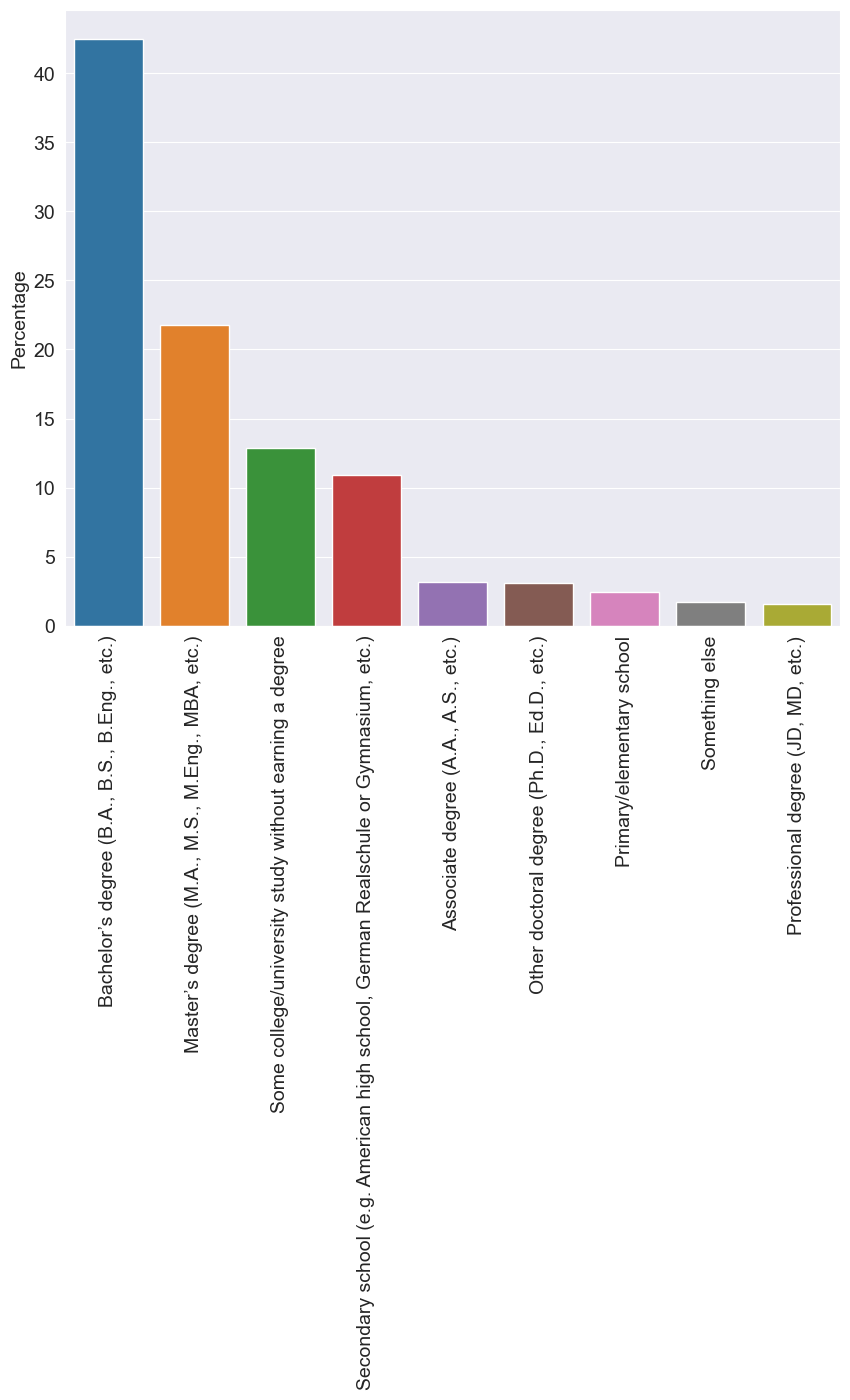

In [372]:
plt.figure(figsize=(10,8))
plt.xticks(rotation = 90)
sns.barplot(x= undergrad_pct.index,y = undergrad_pct)
plt.xlabel(None)
plt.ylabel("Percentage")

# Platfroms, Databases and Languages

In the survey dataset, there are columns containing multiple values. This complicates our analyzing capabilities. 

In [376]:
survey_df.PlatformHaveWorkedWith.unique()

array([nan, 'Firebase;Microsoft Azure', 'AWS;Google Cloud;Heroku', ...,
       'AWS;DigitalOcean;Google Cloud;Heroku;OpenStack',
       'IBM Cloud or Watson;Linode;VMware',
       'Colocation;DigitalOcean;Heroku;Linode;Oracle Cloud Infrastructure;OVH'],
      dtype=object)

In [377]:
survey_df.LanguageHaveWorkedWith.unique()

array([nan, 'JavaScript;TypeScript', 'C#;C++;HTML/CSS;JavaScript;Python',
       ..., 'Assembly;C;C++;Java;TypeScript',
       'Bash/Shell;Dart;JavaScript;PHP;Python;SQL;TypeScript',
       'C#;JavaScript;Lua;PowerShell;SQL;TypeScript'], dtype=object)

In [378]:
survey_df.DatabaseHaveWorkedWith.unique()

array([nan, 'Microsoft SQL Server',
       'Cloud Firestore;Elasticsearch;Microsoft SQL Server;Firebase Realtime Database',
       ...,
       'Cassandra;Cloud Firestore;Elasticsearch;MongoDB;PostgreSQL;SQLite',
       'Elasticsearch;MongoDB;Oracle;SQLite',
       'Microsoft SQL Server;Neo4j;Redis'], dtype=object)

A solution for this is to turn all the multivalued columns into columns with each having a single value only,i.e, each multi value become a column in a new dataframe. If someone has worked with the tech, then a True would be it's value else it will be False.

We would be using the following helper function to achieve this.

In [379]:
# from Jovian data analysis course
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []

    # iterate over the column
    for idx,value in col_series[col_series.notnull()].iteritems():
        # break each value into list of options
        for option in value.split(";"):
            # add the option as columnto result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # mark the value in option column as true
            result_df.at[idx,option] = True
    return result_df[options]

In [380]:

platforms_df = split_multicolumn(survey_df.PlatformHaveWorkedWith)
database_df = split_multicolumn(survey_df.DatabaseHaveWorkedWith)
language_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)

Let us view our now multivalued-rows-turned-to-individual-columns dataframe.

In [381]:
platforms_df

,Firebase,Microsoft Azure,AWS,Google Cloud,Heroku,DigitalOcean,VMware,OVH,Linode,Managed Hosting,IBM Cloud or Watson,Oracle Cloud Infrastructure,OpenStack,Colocation
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,False,False,True,True,False,True,False,False,False,False,False,False,False,False
73264,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,False,True,False,False,False,False,True,False,False,True,False,False,False,False
73266,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [382]:
database_df

,Microsoft SQL Server,Cloud Firestore,Elasticsearch,Firebase Realtime Database,MongoDB,MySQL,Couchbase,CouchDB,PostgreSQL,Redis,DynamoDB,Neo4j,SQLite,Cassandra,MariaDB,Oracle,IBM DB2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False,False,False
73264,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False
73265,True,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False
73266,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [383]:
language_df

,JavaScript,TypeScript,C#,C++,HTML/CSS,Python,SQL,Swift,Lua,PHP,...,F#,Clojure,APL,Crystal,Fortran,Objective-C,SAS,OCaml,Solidity,COBOL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,True,True,False,False,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
73264,True,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,True,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
73266,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [384]:
platforms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Firebase                     73268 non-null  bool 
 1   Microsoft Azure              73268 non-null  bool 
 2   AWS                          73268 non-null  bool 
 3   Google Cloud                 73268 non-null  bool 
 4   Heroku                       73268 non-null  bool 
 5   DigitalOcean                 73268 non-null  bool 
 6   VMware                       73268 non-null  bool 
 7   OVH                          73268 non-null  bool 
 8   Linode                       73268 non-null  bool 
 9   Managed Hosting              73268 non-null  bool 
 10  IBM Cloud or Watson          73268 non-null  bool 
 11  Oracle Cloud Infrastructure  73268 non-null  bool 
 12  OpenStack                    73268 non-null  bool 
 13  Colocation                   73268 non-null  b

That is much better. Let us check the others as well.

In [387]:
database_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Microsoft SQL Server        73268 non-null  bool 
 1   Cloud Firestore             73268 non-null  bool 
 2   Elasticsearch               73268 non-null  bool 
 3   Firebase Realtime Database  73268 non-null  bool 
 4   MongoDB                     73268 non-null  bool 
 5   MySQL                       73268 non-null  bool 
 6   Couchbase                   73268 non-null  bool 
 7   CouchDB                     73268 non-null  bool 
 8   PostgreSQL                  73268 non-null  bool 
 9   Redis                       73268 non-null  bool 
 10  DynamoDB                    73268 non-null  bool 
 11  Neo4j                       73268 non-null  bool 
 12  SQLite                      73268 non-null  bool 
 13  Cassandra                   73268 non-null  bool 
 14  MariaD

Seems the same here. We will assume that it is the same languages dataframe. Let us do the above cleaning in this two as well.

Let us save and upload our work to Jovian before continuing

In [388]:
database_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Microsoft SQL Server        73268 non-null  bool 
 1   Cloud Firestore             73268 non-null  bool 
 2   Elasticsearch               73268 non-null  bool 
 3   Firebase Realtime Database  73268 non-null  bool 
 4   MongoDB                     73268 non-null  bool 
 5   MySQL                       73268 non-null  bool 
 6   Couchbase                   73268 non-null  bool 
 7   CouchDB                     73268 non-null  bool 
 8   PostgreSQL                  73268 non-null  bool 
 9   Redis                       73268 non-null  bool 
 10  DynamoDB                    73268 non-null  bool 
 11  Neo4j                       73268 non-null  bool 
 12  SQLite                      73268 non-null  bool 
 13  Cassandra                   73268 non-null  bool 
 14  MariaD

In [389]:
language_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   JavaScript   73268 non-null  bool 
 1   TypeScript   73268 non-null  bool 
 2   C#           73268 non-null  bool 
 3   C++          73268 non-null  bool 
 4   HTML/CSS     73268 non-null  bool 
 5   Python       73268 non-null  bool 
 6   SQL          73268 non-null  bool 
 7   Swift        73268 non-null  bool 
 8   Lua          73268 non-null  bool 
 9   PHP          73268 non-null  bool 
 10  C            73268 non-null  bool 
 11  Java         73268 non-null  bool 
 12  Delphi       73268 non-null  bool 
 13  Bash/Shell   73268 non-null  bool 
 14  PowerShell   73268 non-null  bool 
 15  Rust         73268 non-null  bool 
 16  Elixir       73268 non-null  bool 
 17  Erlang       73268 non-null  bool 
 18  Ruby         73268 non-null  bool 
 19  R            73268 non-null  bool 
 20  Scala 

Perfect! We have created an dataframe from one column which had multiple values in it.

Now let us try to see some useful things from this data. First let us see which platfroms are the most popular.

In [390]:
platforms_df.sum().sort_values(ascending=False) # find column wise sums

AWS                            25283
Microsoft Azure                14282
Google Cloud                   13264
Firebase                       10507
Heroku                          9862
                               ...  
OVH                             1830
Oracle Cloud Infrastructure     1066
OpenStack                        974
IBM Cloud or Watson              811
Colocation                       602
Length: 14, dtype: int64

Similary, we do so for database_df and language_df.

In [391]:
database_df.sum().sort_values(ascending=False)

MySQL                   27860
PostgreSQL              25830
SQLite                  18933
MongoDB                 16814
Microsoft SQL Server    16035
                        ...  
Cassandra                1558
Neo4j                    1244
IBM DB2                  1175
Couchbase                 773
CouchDB                   745
Length: 17, dtype: int64

In [392]:
language_df.sum().sort_values(ascending=False)

JavaScript    45188
HTML/CSS      37997
SQL           34213
Python        33117
TypeScript    24037
              ...  
APL             448
COBOL           429
SAS             404
OCaml           385
Crystal         307
Length: 42, dtype: int64

## Asking and Answering Questions

From the above exploration, let us try to answer some very interesting questions.



#### Q1: What is the most popular platforms, databases and languages among the respondents in 2022?

<AxesSubplot:xlabel='Number of responses', ylabel='Platforms'>

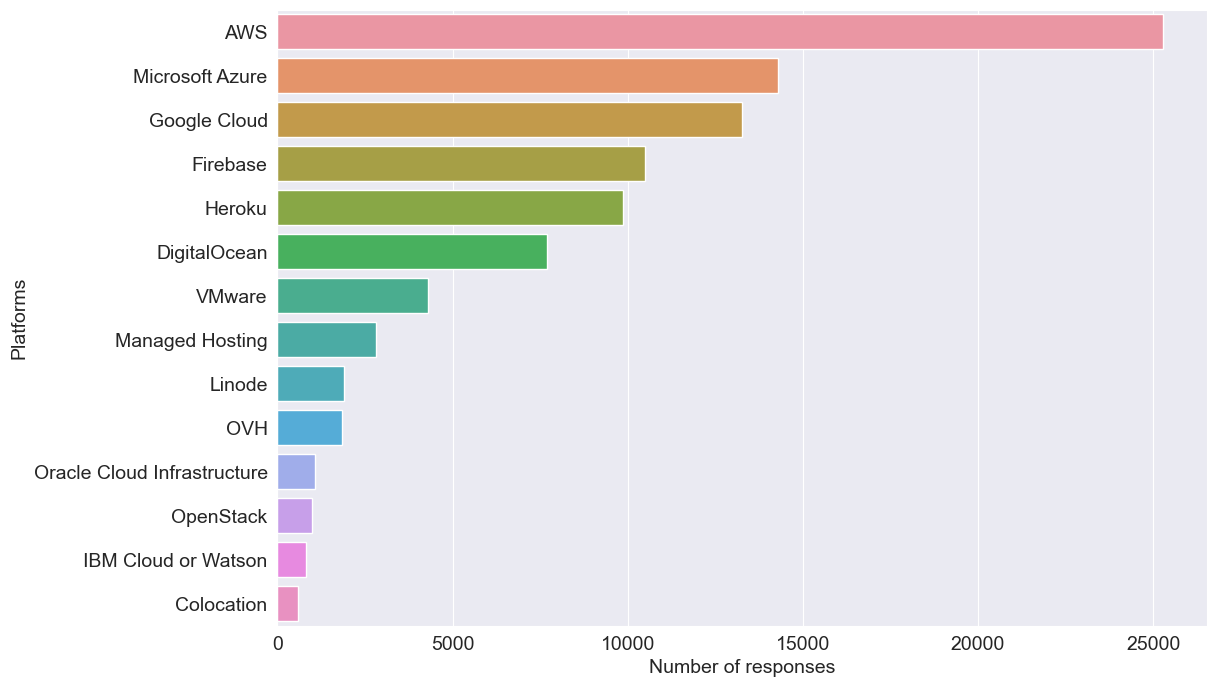

In [393]:
most_popular_platforms = platforms_df.sum().sort_values(ascending=False)
plt.figure(figsize=(12,8))
plt.xlabel("Number of responses")
plt.ylabel("Platforms")
sns.barplot(x = most_popular_platforms,y = most_popular_platforms.index)

<AxesSubplot:xlabel='Number of responses', ylabel='Databases'>

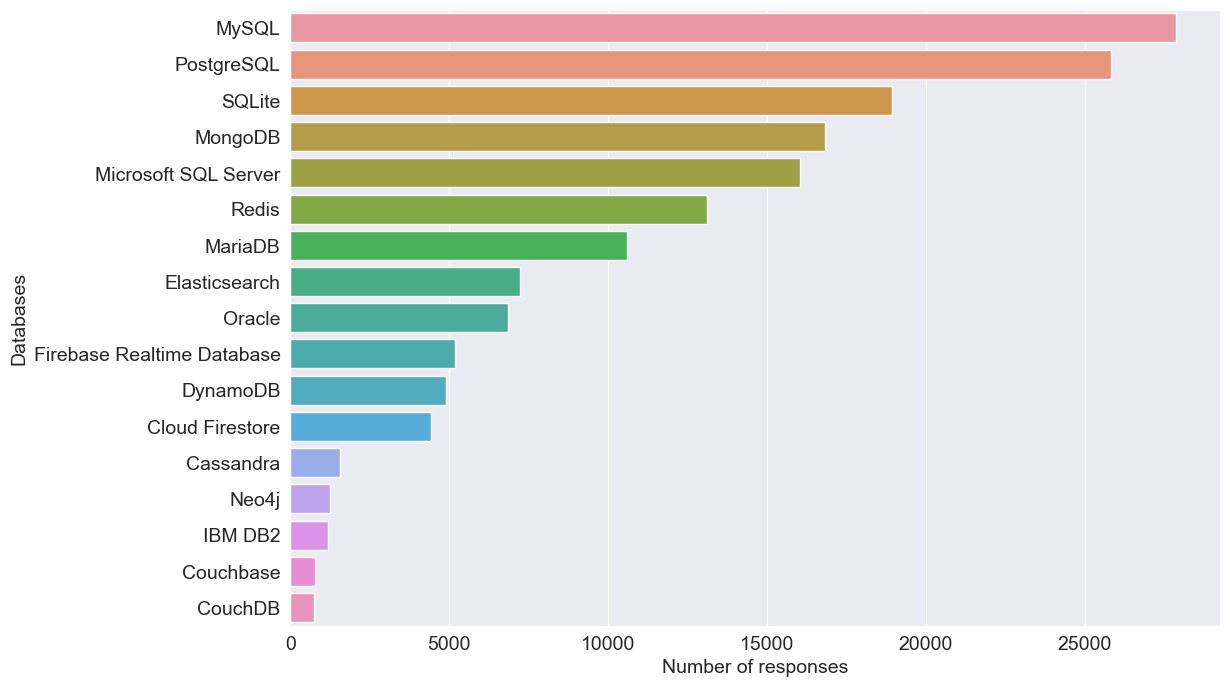

In [394]:
most_popular_databases = database_df.sum().sort_values(ascending=False)
plt.figure(figsize=(12,8))
plt.xlabel("Number of responses")
plt.ylabel("Databases")
sns.barplot(x = most_popular_databases,y = most_popular_databases.index)

<AxesSubplot:xlabel='Number of responses', ylabel='Databases'>

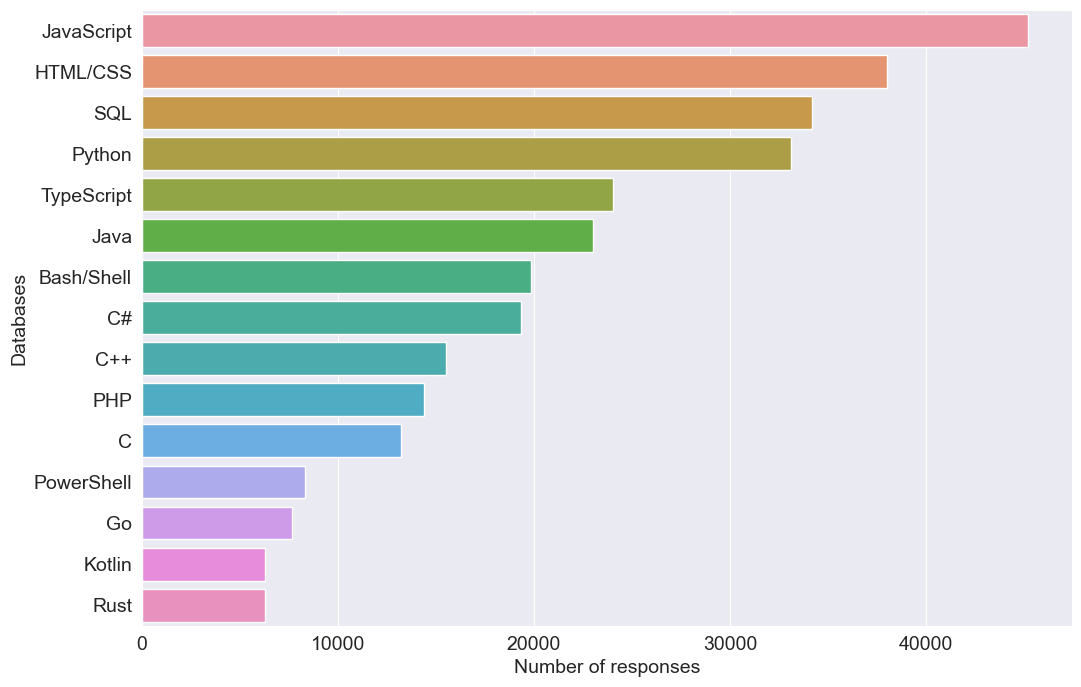

In [395]:
most_popular_languages = language_df.sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,8))
plt.xlabel("Number of responses")
plt.ylabel("Databases")
sns.barplot(x = most_popular_languages,y = most_popular_languages.index)

From the above plots, we can easily conclude that,among the respondents :

>- Most Popular Platform : AWS
>- Most Popular Database : MySQL
>- Most Poular Language : Javascript 

These conclusions makes sense. Since everything is moving towards the web, having AWS as the most popular platform for hosting sites makes sense. Plus, everyone needs a database to store customer data, and MySQL is usually the first database that students learn.Also MySQL is itself very robust and has a strong community of supporters as well. Coming to languages, since the Internet has grown so much, so has the demand of websites that are responsive. So it makes sense that javascript and html/css are so high above in terms of popularity (although html/css are not programming languages). Python's demand has risen dramatically, beating even Java. This rise can be attributed to its strong presence in the Data Science and ML space, as well as it's high level features and easy to understand syntax.

#### Q2: What is the operating system distribution among the respondents?

The choice of Operating System can be a huge factor in terms of someone's productivity. From specialised work apps like CAD to simple web browsing, different people have different needs and so their choice of operating system reflects that. Let's us see what people use both in their workstations and PCs.

In [396]:
stackoverflow_raw_df['OpSysProfessional use']

0                        NaN
1                      macOS
2                    Windows
3                    Windows
4                    Windows
                ...         
73263                  macOS
73264    Linux-based;Windows
73265                Windows
73266                Windows
73267    Linux-based;Windows
Name: OpSysProfessional use, Length: 73268, dtype: object

Seems their are multiple values here. We can assume the same is true for private computers as well. Glad our helper function is their to come to our rescue.

In [397]:
opsys_professional = split_multicolumn(stackoverflow_raw_df['OpSysProfessional use'])
opsys_professional

,macOS,Windows,Linux-based,Windows Subsystem for Linux (WSL),Other (please specify):,BSD
0,False,False,False,False,False,False
1,True,False,False,False,False,False
2,False,True,False,False,False,False
3,False,True,False,False,False,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
73263,True,False,False,False,False,False
73264,False,True,True,False,False,False
73265,False,True,False,False,False,False
73266,False,True,False,False,False,False


In [398]:
opsys_personal = split_multicolumn(stackoverflow_raw_df['OpSysPersonal use'])
opsys_personal

,Windows Subsystem for Linux (WSL),Windows,macOS,Linux-based,Other (please specify):,BSD
0,False,False,False,False,False,False
1,True,False,False,False,False,False
2,False,True,False,False,False,False
3,False,True,False,False,False,False
4,False,True,True,False,False,False
...,...,...,...,...,...,...
73263,False,False,True,True,False,False
73264,False,True,False,True,False,False
73265,False,True,False,False,False,False
73266,False,True,False,False,False,False


We will now plot Pie charts for each dataframe to get a visualization of the distribution.


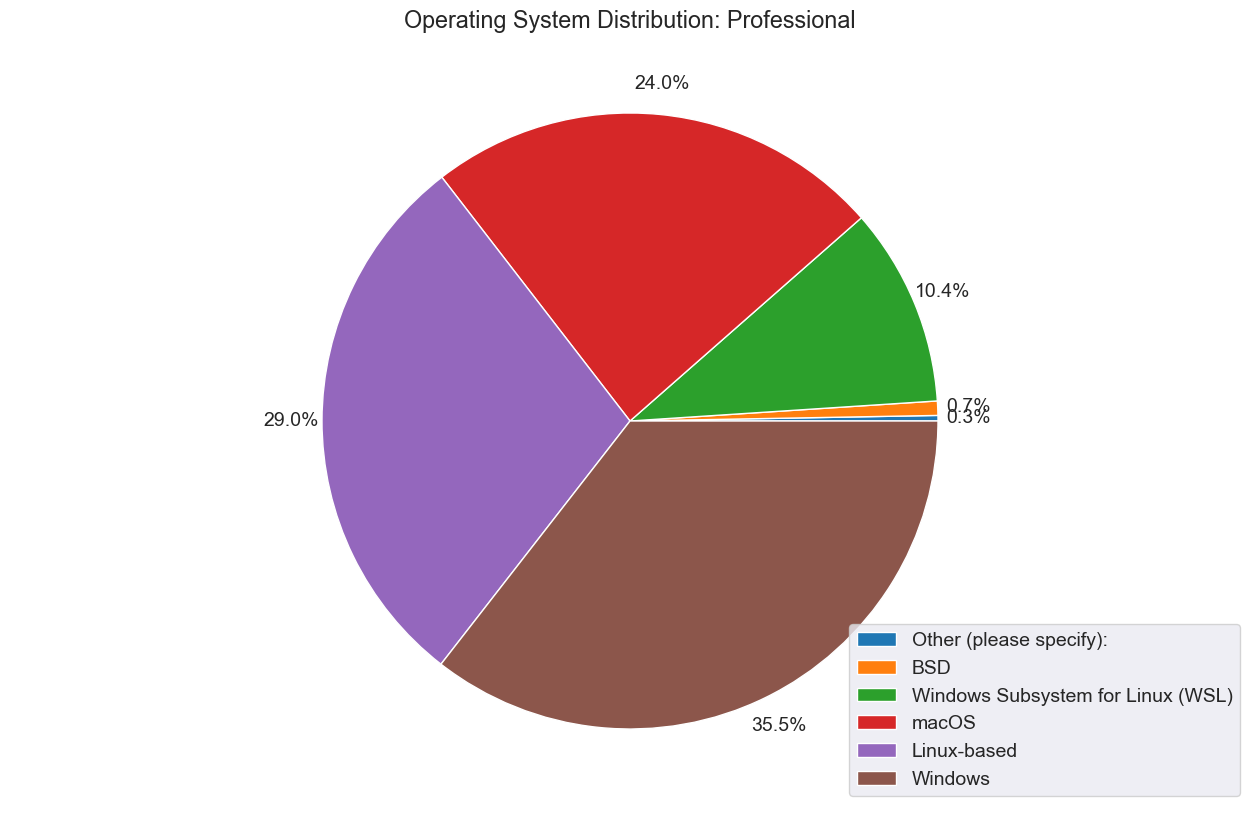

In [399]:
opsys_professional_distribution = opsys_professional.mean().sort_values()

fig = plt.figure(4, figsize=(16,10))
ax = fig.add_subplot(111) 
ax.set_title("Operating System Distribution: Professional", loc = 'center' )
ax.axis("off")
pie = ax.pie(opsys_professional_distribution, autopct="%1.1f%%",pctdistance=1.1,)
ax2 = fig.add_subplot(212)
ax2.axis("off") 
ax2.legend(pie[0],opsys_professional_distribution.index, loc="lower right")

We can see that Windows is the most popular OS interms of market share. However, it doesn't hold as much of a  big difference from MacOS and Linux. Since Stackoverflow is a Developer website and since Development is much more easier on Unix based systems compared to windows, them them having such huge numbers for them is not unheard of. However, WSL(Windows Subsystem for Linux) seems to be also used by a lot of people. WSL solves the hassle of dual booting, by baking in a Linux kernel directly into Windows, running on a Virtual Machine. So you get the development prowess of Unix and ease of use of Windows, all in one package.


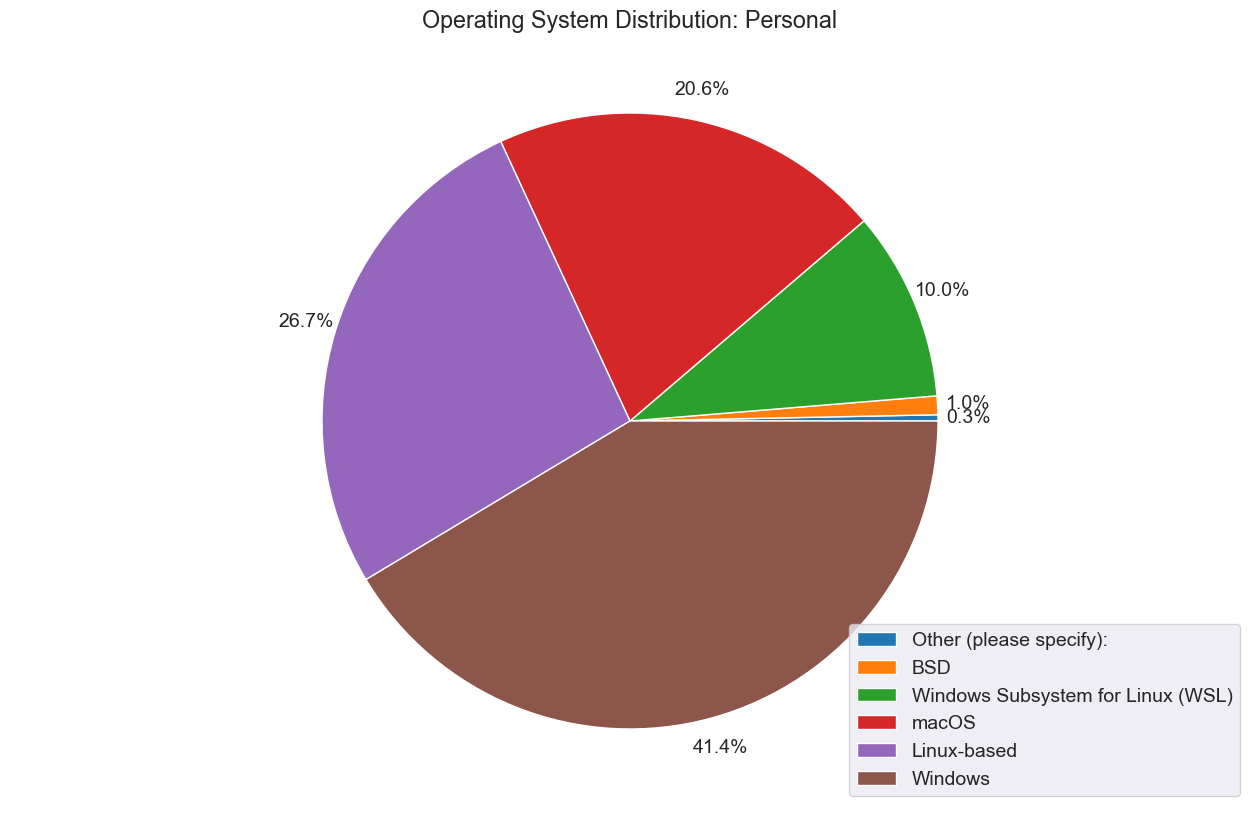

In [400]:
opsys_personal_distribution = opsys_personal.mean().sort_values()

fig = plt.figure(4, figsize=(16,10))
ax = fig.add_subplot(111) 
ax.set_title("Operating System Distribution: Personal", loc = 'center' )
ax.axis("off")
pie = ax.pie(opsys_personal_distribution, autopct="%1.1f%%",pctdistance=1.1,)
ax2 = fig.add_subplot(212)
ax2.axis("off") 
ax2.legend(pie[0],opsys_personal_distribution.index, loc="lower right")

We can see here that , interms of individual OS's, Windows is dominating. Windows has a market share of 41%, which shows how much it is popular among the respondents. This is not surprising and can be attributed to the fact that , in terms of providing entertainment and ease of use, windows is still prefered alot. Also, Windows is ,for most people, the first OS they come across, so they tend to not change their OS as it would mean changing alot of habits. 

Moving on , we can see that Linux enjoys alot of popularity among respondents. This can be attributed to fact that, as seen above, alot of developers use it professionaly. So they use it at home as well due to a sense of familiarity. MacOS, another Unix based system, also enjoys alot of popularity among developers due to it's modern look  and Unix's development prowess. It can be considered the best of Both from Windows and Linux.


Do note that both of this distributions is far from the actual distributions of the OS's worldwide, where Windows sits well over 80% in terms of market share and Linux enjoys a measly 1% of share.

#### Q3: Can you find the popularity of  programming languages country wise?

Let us try to visualize a language's popularity based on the country. We will start with India.

In [401]:
languages_india_df = stackoverflow_raw_df.LanguageHaveWorkedWith.loc[stackoverflow_raw_df.Country == "India"] # this returns the responses of those who are Indians

In [402]:
languages_india_df # multiple values here

6            C++;HTML/CSS;JavaScript;PHP;Python;TypeScript
7                       C;C++;HTML/CSS;Java;JavaScript;SQL
65                                                      C#
140                  HTML/CSS;JavaScript;Kotlin;TypeScript
151         Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL
                               ...                        
73184                                          Java;Python
73193                                  HTML/CSS;JavaScript
73255    Bash/Shell;C#;HTML/CSS;JavaScript;Perl;PowerSh...
73257                                         C;Python;SQL
73258                                          Go;Java;SQL
Name: LanguageHaveWorkedWith, Length: 6639, dtype: object

In [403]:
languages_popular_india = split_multicolumn(languages_india_df) # using the helper function

In [404]:
languages_popular_india

,C++,HTML/CSS,JavaScript,PHP,Python,TypeScript,C,Java,SQL,C#,...,Solidity,APL,Erlang,Fortran,VBA,Groovy,SAS,Crystal,COBOL,Delphi
6,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,True,True,True,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
65,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
140,False,True,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
151,False,True,True,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73184,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
73193,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73255,False,True,True,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
73257,False,False,False,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [405]:
languages_popular_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6639 entries, 6 to 73258
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   C++          6639 non-null   bool 
 1   HTML/CSS     6639 non-null   bool 
 2   JavaScript   6639 non-null   bool 
 3   PHP          6639 non-null   bool 
 4   Python       6639 non-null   bool 
 5   TypeScript   6639 non-null   bool 
 6   C            6639 non-null   bool 
 7   Java         6639 non-null   bool 
 8   SQL          6639 non-null   bool 
 9   C#           6639 non-null   bool 
 10  Kotlin       6639 non-null   bool 
 11  Bash/Shell   6639 non-null   bool 
 12  Assembly     6639 non-null   bool 
 13  Go           6639 non-null   bool 
 14  Ruby         6639 non-null   bool 
 15  Rust         6639 non-null   bool 
 16  Dart         6639 non-null   bool 
 17  Perl         6639 non-null   bool 
 18  PowerShell   6639 non-null   bool 
 19  Lua          6639 non-null   bool 
 20  Clojure

We shall Look at the top 15 only.

<AxesSubplot:title={'center':'Popular Languages : India'}, xlabel='Percentage', ylabel='Languages'>

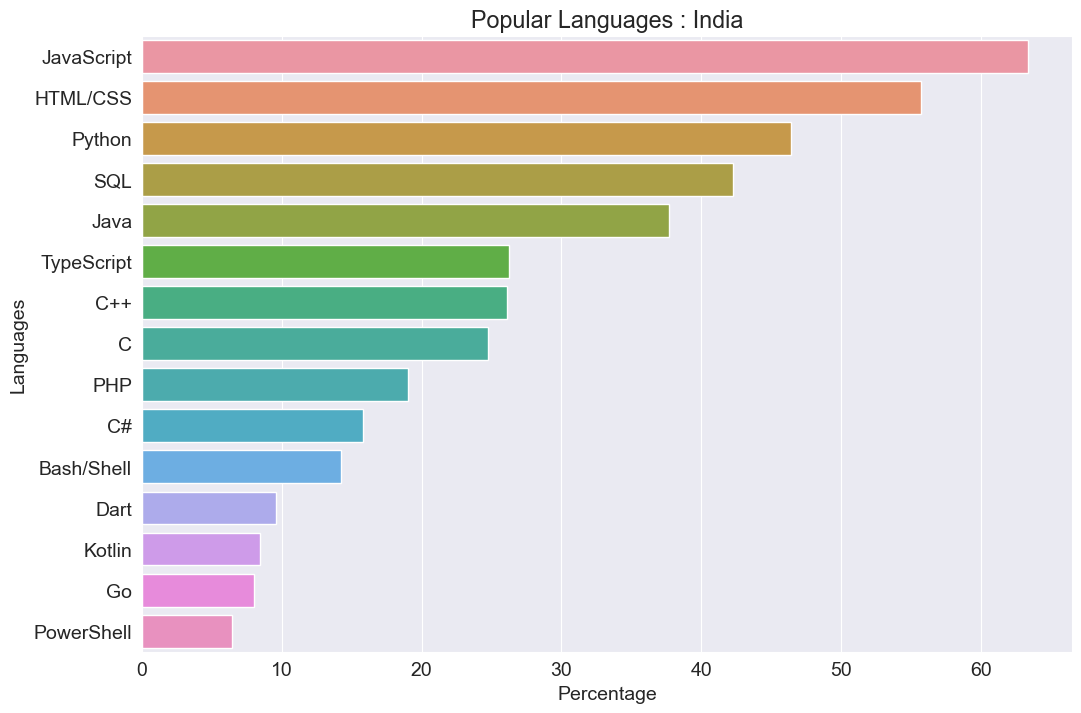

In [406]:
popular_languages_india = languages_popular_india.mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,8))

plt.xlabel("Percentage")
plt.ylabel("Languages")
plt.title("Popular Languages : India")
sns.barplot(y = popular_languages_india.index, x = popular_languages_india*100)


Seems Indians are mostly upskilling themselves in Web Development Technologies. This conforms with the global popularity as well which we showed above in Q1.

Let us now look at the USA.

In [407]:
languages_usa_df = stackoverflow_raw_df.LanguageHaveWorkedWith.loc[stackoverflow_raw_df.Country == "United States of America"]

In [408]:
languages_usa_df

4              C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
11       C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL
12                    C;HTML/CSS;Rust;SQL;Swift;TypeScript
14             HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala
26          Bash/Shell;Groovy;HTML/CSS;Java;JavaScript;SQL
                               ...                        
73231    C#;HTML/CSS;Java;JavaScript;PowerShell;Python;...
73240        Bash/Shell;HTML/CSS;JavaScript;PHP;TypeScript
73254                                                    R
73264            Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73265                   HTML/CSS;JavaScript;PHP;Python;SQL
Name: LanguageHaveWorkedWith, Length: 13543, dtype: object

In [409]:
languages_popular_usa = split_multicolumn(languages_usa_df)

In [410]:
languages_popular_usa

,C#,HTML/CSS,JavaScript,SQL,Swift,TypeScript,PowerShell,Python,Rust,C,...,MATLAB,Elixir,F#,Haskell,OCaml,Julia,Solidity,COBOL,Crystal,Delphi
4,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,True,True,True,True,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
12,False,True,False,True,True,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
14,False,True,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
26,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73231,True,True,True,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
73240,False,True,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73254,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73264,False,True,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:title={'center':'Popular Languages : USA'}, xlabel='Percentage', ylabel='Languages'>

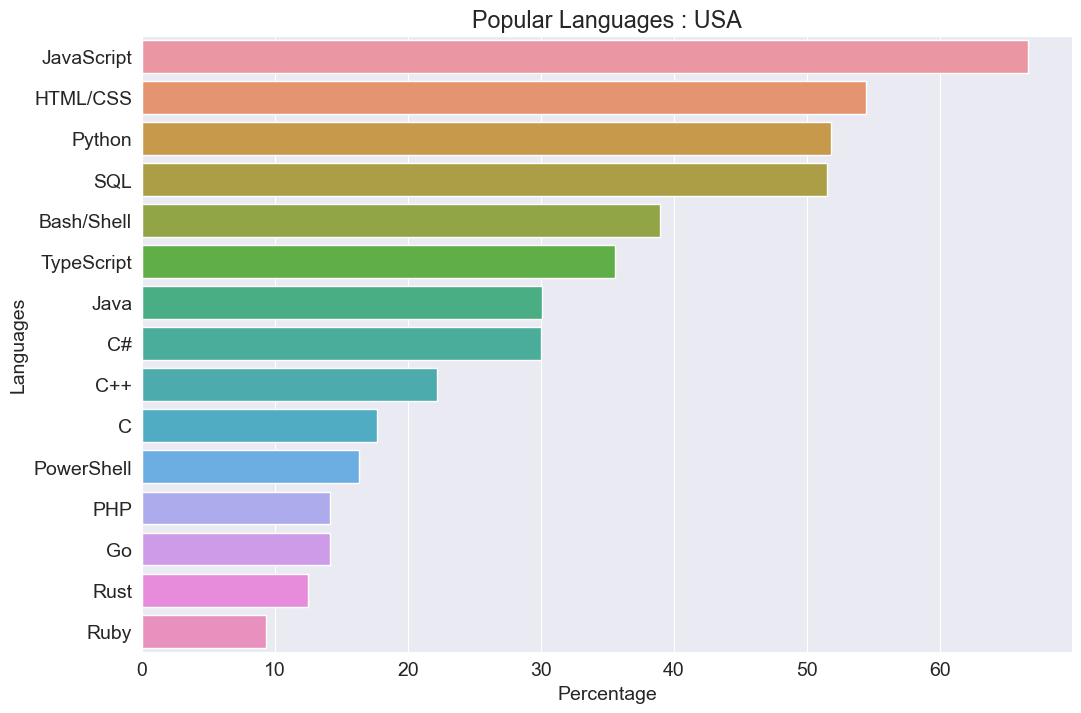

In [411]:
popular_languages_usa = languages_popular_usa.mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,8))

plt.xlabel("Percentage")
plt.ylabel("Languages")
plt.title("Popular Languages : USA")
sns.barplot(y = popular_languages_usa.index, x = popular_languages_usa*100)

Seems  Web technologies are popular in the USA as well.

We should note that Python is in top 5 languages of both countires. It is due to it's simple syntax and high level nature which has led it to be incorporated in Web technologies (Django,Flask, MongoDB,etc). Not only that but it is also the goto language for ML and AI, Data Science, Data Analysis,etc. Even this project is based on it.

#### Q4: What are the languages people want to work with in the future?

We want to find the languages that people want to work with in the near future.

In [412]:
language_want = stackoverflow_raw_df.LanguageWantToWorkWith

In [413]:
languages_want_to_work  = split_multicolumn(language_want)

In [414]:
 languages_want_to_work.info() # seems there are no ethnicity values here.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Rust         73268 non-null  bool 
 1   TypeScript   73268 non-null  bool 
 2   C#           73268 non-null  bool 
 3   C++          73268 non-null  bool 
 4   HTML/CSS     73268 non-null  bool 
 5   JavaScript   73268 non-null  bool 
 6   SQL          73268 non-null  bool 
 7   Elixir       73268 non-null  bool 
 8   F#           73268 non-null  bool 
 9   Go           73268 non-null  bool 
 10  Lua          73268 non-null  bool 
 11  C            73268 non-null  bool 
 12  Java         73268 non-null  bool 
 13  Kotlin       73268 non-null  bool 
 14  Python       73268 non-null  bool 
 15  Swift        73268 non-null  bool 
 16  APL          73268 non-null  bool 
 17  Bash/Shell   73268 non-null  bool 
 18  Delphi       73268 non-null  bool 
 19  Haskell      73268 non-null  bool 
 20  Erlang

Now, let us plot the top 15 of these languages.

Text(0.5, 0, 'Percentage')

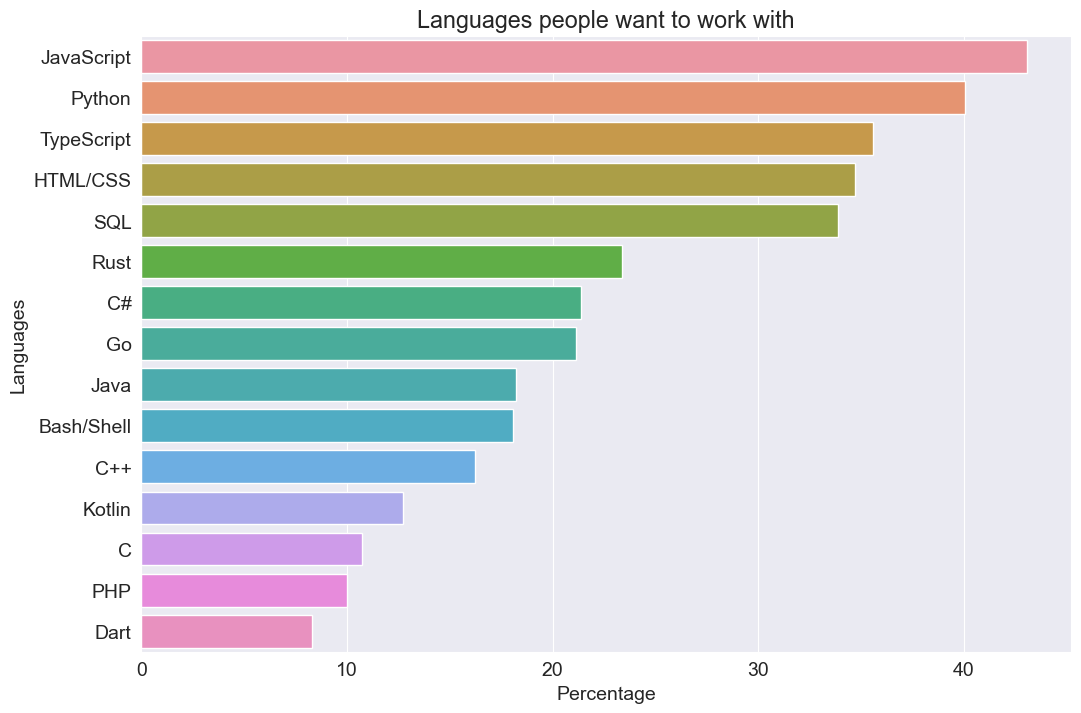

In [415]:
languages_want_to_work_percentage = languages_want_to_work.mean().sort_values(ascending = False) * 100

plt.figure(figsize=(12,8))

sns.barplot(x = languages_want_to_work_percentage.head(15), y = languages_want_to_work_percentage.head(15).index)

plt.title("Languages people want to work with")
plt.ylabel("Languages")
plt.xlabel("Percentage")

Seems that web related technologies are at the top of the wish bucket for people to work with. Also, we can see that python is also one of the languages people want to work with, as it is at the position 2 on this list. This is an good indicator for a language's popularity and it's over all growth and prospects in the future. Python's easy syntax, open-source nature and high level language capabilities make it a language taht is going to stick around for a long time. 

#### Q5: What are the languages that people love the most? (By loved, we mean a language that people have worked  with and want to continue doing so.)

While this question may seem tricky at first, it's really easy to solve using Pandas array operations
Here's what we can do:
>- Create a new data frame languages_loved_df which contains a True value for a
language only if the corresponding values in languages_df and
languages_want_to_work are both True. This basically does an element wise and operation on all  columns.
>- Take the column wise sum of languages_loved_df and divide it by the column-wise
of languages_worked_df to get the percentage of respondents who "love" the language.
>- Sort the results in decreasing order and plot a horizontal bar graph.

In [416]:
language_loved = language_df & languages_want_to_work

Now, to find how many people love the language perecentage we will do a simple calculation.

We will  divide the sum of a langauge column of language_loved with the sum of the same language column in language_df. This basically gives us the number of people who , having previously worked with the language, wants to continue working with it.

In [417]:
language_loved_perecentage = (language_loved.sum()  / language_df.sum()) * 100

In [418]:
language_loved_perecentage.sort_values(ascending=False)

Rust           86.624204
Elixir         75.911906
Clojure        75.245580
TypeScript     73.457586
Julia          71.884058
                 ...    
Fortran        25.404531
Objective-C    22.818792
VBA            21.234648
MATLAB         18.858561
COBOL          17.249417
Length: 42, dtype: float64

Text(0.5, 0, 'Percentage')

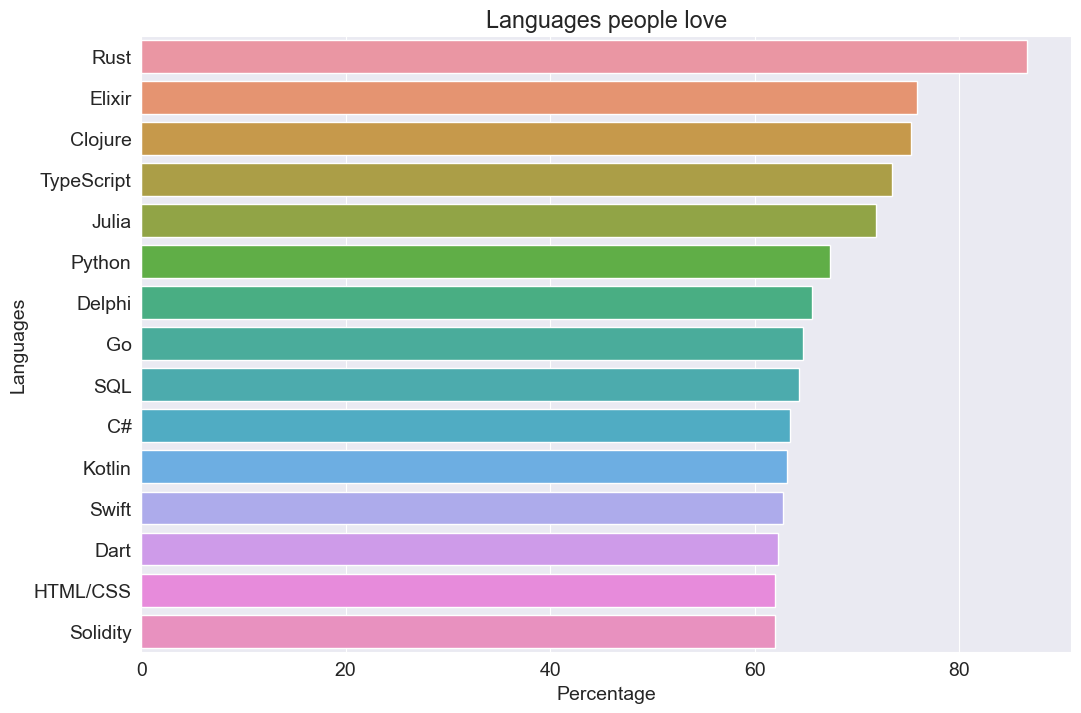

In [419]:
plt.figure(figsize=(12,8))

sns.barplot(x = language_loved_perecentage.sort_values(ascending=False).head(15), y = language_loved_perecentage.sort_values(ascending=False).head(15).index)

plt.title("Languages people love")
plt.ylabel("Languages")
plt.xlabel("Percentage")

Seems Rust is the most loved language among the respondents. Rust is an language that provides the performance capabilities of C/C++ but is very safe interms of memory leaks and many more. Rust is also highly in demand and alot of the companies are implementing it in their products. The community of Rust has also grown alot in the last few years, which is a good indicator of it's overall development and growth. And Rust is also open source.

 Python is also one of the top results which is due to the fact the python keeps getting interesting with new releases and also keeps building in new features to the core language.

Let us save and upload our work to Jovian before continuing.

#### Q6: What are the languages that people dread the most? (By dread, we mean a language that people have worked  with and don't want to continue doing so.)

We can get the languages people don't want to work with by inverting the languages people want to work with df. This is achieved using the tilda operator ~.

In [420]:
languages_not_interested  = ~ languages_want_to_work

In [421]:
languages_not_interested

,Rust,TypeScript,C#,C++,HTML/CSS,JavaScript,SQL,Elixir,F#,Go,...,Assembly,Solidity,R,Crystal,Objective-C,SAS,OCaml,MATLAB,Fortran,COBOL
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,False,False,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,True,True,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,True,False,True,True,True,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
73264,True,True,True,True,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
73265,True,True,False,True,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
73266,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [422]:
language_dread = languages_not_interested & language_df

In [423]:
language_dread_percentage = (language_dread.sum() / language_df.sum()) * 100

In [424]:
language_dread_percentage.sort_values(ascending =False).head(15)

COBOL          82.750583
MATLAB         81.141439
VBA            78.765352
Objective-C    77.181208
Fortran        74.595469
                 ...    
R              58.830885
PHP            58.473399
Lua            57.817109
Crystal        56.677524
PowerShell     56.180723
Length: 15, dtype: float64

Text(0.5, 0, 'Percentage')

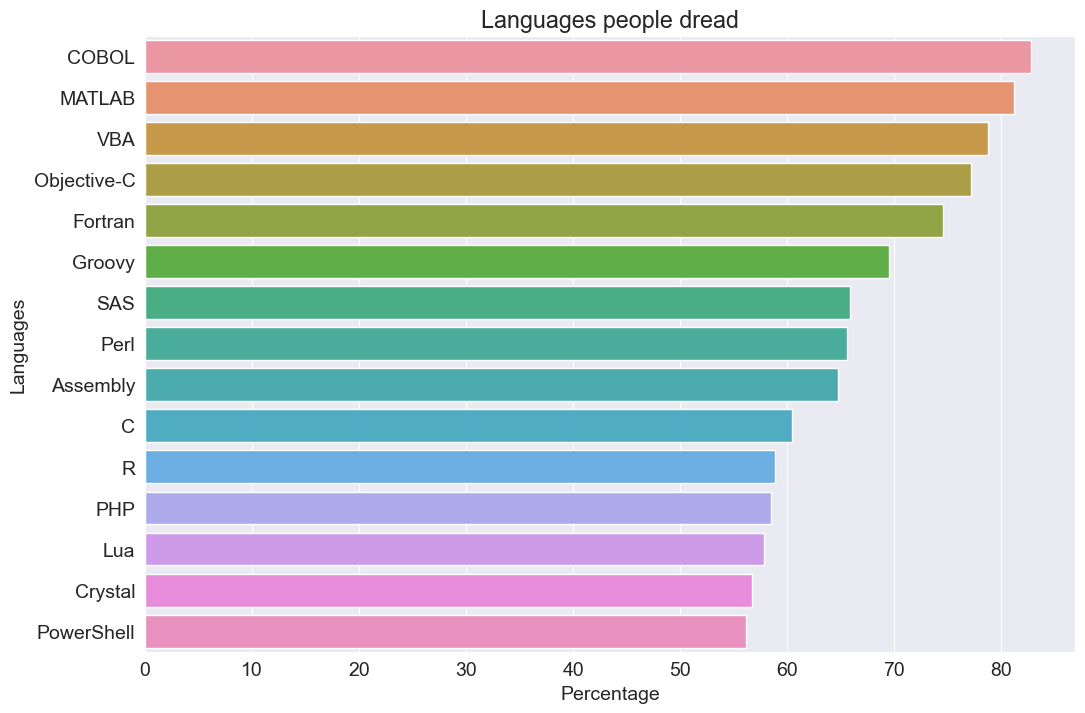

In [425]:
plt.figure(figsize=(12,8))

sns.barplot(x = language_dread_percentage.sort_values(ascending=False).head(15), y = language_dread_percentage.sort_values(ascending=False).head(15).index)

plt.title("Languages people dread")
plt.ylabel("Languages")
plt.xlabel("Percentage")

Seems COBOL and MATALB are the 2 most dreaded languages in the list. This makes sense as COBOL is now only used in very old bank systems and all of MATLAB's  functionality can be done in Python itself, so people don't seem to be keen to use it. Also, MATLAB is closed source while Python is open source and MATLAB is a very limited language while Python is quite versatile interms of what it can do, so Python is clear winner for this.

#### Q7: What are the different Developer Roles of the respondents?

In [426]:
dev_type_raw = stackoverflow_raw_df.DevType

In [427]:
dev_type = split_multicolumn(dev_type_raw)

In [428]:
dev_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   Data scientist or machine learning specialist  73268 non-null  bool 
 1   Developer, front-end                           73268 non-null  bool 
 2   Engineer, data                                 73268 non-null  bool 
 3   Engineer, site reliability                     73268 non-null  bool 
 4   Developer, full-stack                          73268 non-null  bool 
 5   Developer, back-end                            73268 non-null  bool 
 6   Developer, desktop or enterprise applications  73268 non-null  bool 
 7   Developer, QA or test                          73268 non-null  bool 
 8   Student                                        73268 non-null  bool 
 9   Developer, mobile                              73268 non-null  bool 
 10

In [429]:
dev_type_percentage = dev_type.mean().sort_values(ascending=False) * 100

Text(0.5, 0, 'Percentage')

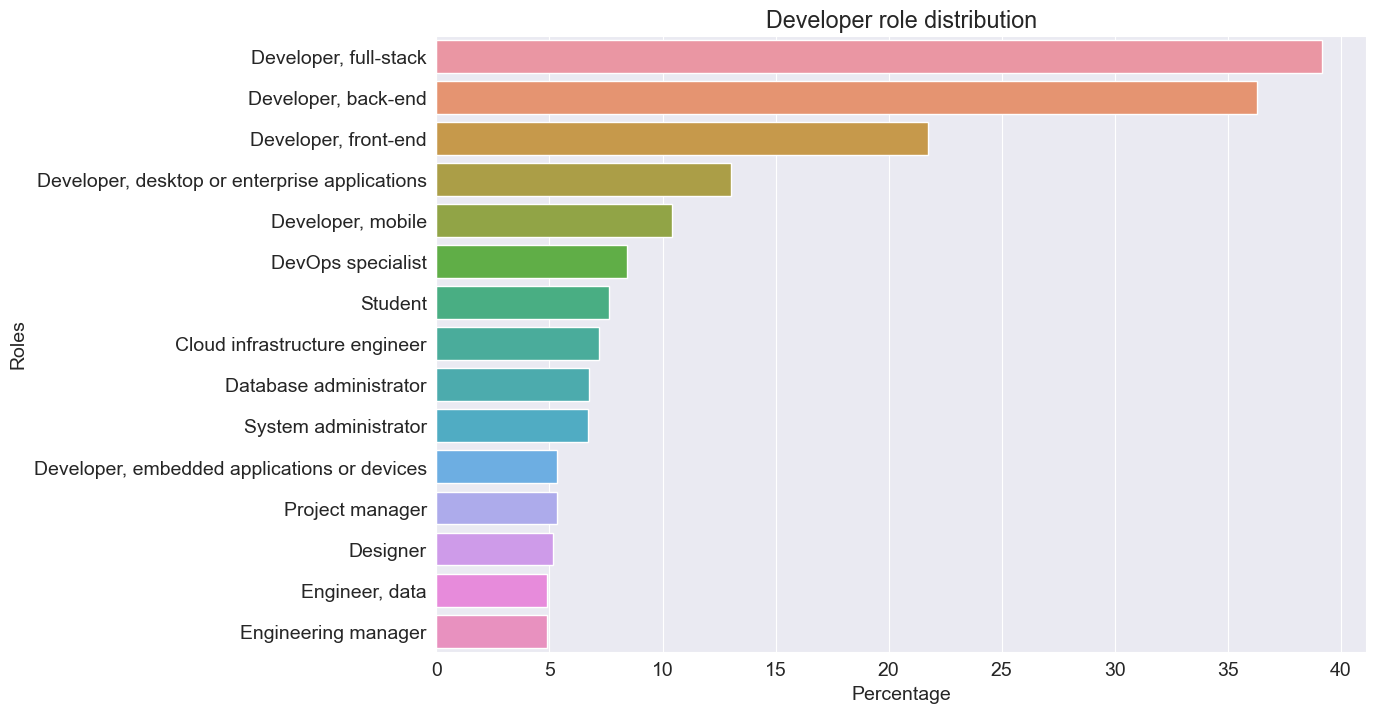

In [430]:
plt.figure(figsize=(12,8))

sns.barplot(x = dev_type_percentage.head(15), y = dev_type_percentage.head(15).index)

plt.title("Developer role distribution")
plt.ylabel("Roles")
plt.xlabel("Percentage")

Seems being a Fullstack developer is the most common job profile among the respondents. Also, we can note down that the top 3 roles among the respondents are all related to web technology , leading to us conclude that people who are working in these domains are going to be in demand for a while.

#### Q8) What is the amount of years a person has been coding, both professionally and non-professionally?

In [ ]:
We would like to see what is the most amount of time that people have coded and draw conclusions from it.

In [431]:
schema_raw_df.YearsCode

'Including any education, how many years have you been coding in total?'

In [432]:
schema_raw_df.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [436]:
years_code = survey_df.YearsCode
years_code

0         NaN
1         NaN
2        14.0
3        20.0
4         8.0
         ... 
73263     8.0
73264     6.0
73265    42.0
73266    50.0
73267    16.0
Name: YearsCode, Length: 73268, dtype: float64

In [437]:
years_code_pro = survey_df.YearsCodePro
years_code_pro

0         NaN
1         NaN
2         5.0
3        17.0
4         3.0
         ... 
73263     5.0
73264     5.0
73265    33.0
73266    31.0
73267     5.0
Name: YearsCodePro, Length: 73268, dtype: float64

In [448]:
years_code_count = years_code.value_counts(ascending=False)
years_code_count

10.0    5069
5.0     5055
6.0     4516
4.0     4352
7.0     4125
        ... 
50.0      67
46.0      57
47.0      41
48.0      39
49.0      35
Name: YearsCode, Length: 50, dtype: int64

<AxesSubplot:title={'center':'How many years of Coding Non-professionaly'}, xlabel='Years of Experieence', ylabel='YearsCode'>

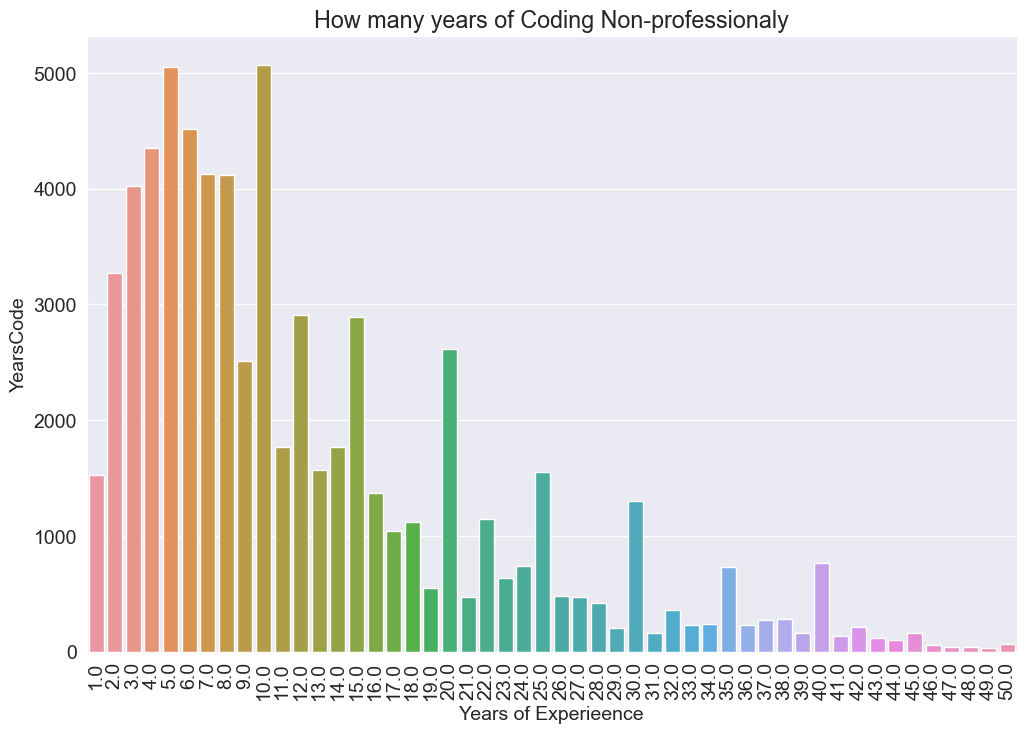

In [457]:

plt.figure(figsize=(12,8))

plt.xlabel("Years of Experieence")
plt.ylabel("Number of Responses")
plt.title("How many years of Coding Non-professionaly")
plt.xticks(rotation = 90)
sns.barplot(x = years_code_count.index,y = years_code_count)

In [455]:
years_code_pro_count = years_code_pro.value_counts()
years_code_pro_count

3.0     4179
5.0     3955
2.0     3852
4.0     3784
10.0    3251
        ... 
46.0      19
48.0      17
50.0      14
47.0      10
49.0       8
Name: YearsCodePro, Length: 50, dtype: int64

<AxesSubplot:title={'center':'How many years of Coding knowledge respondents have'}, xlabel='Years of Experieence', ylabel='YearsCodePro'>

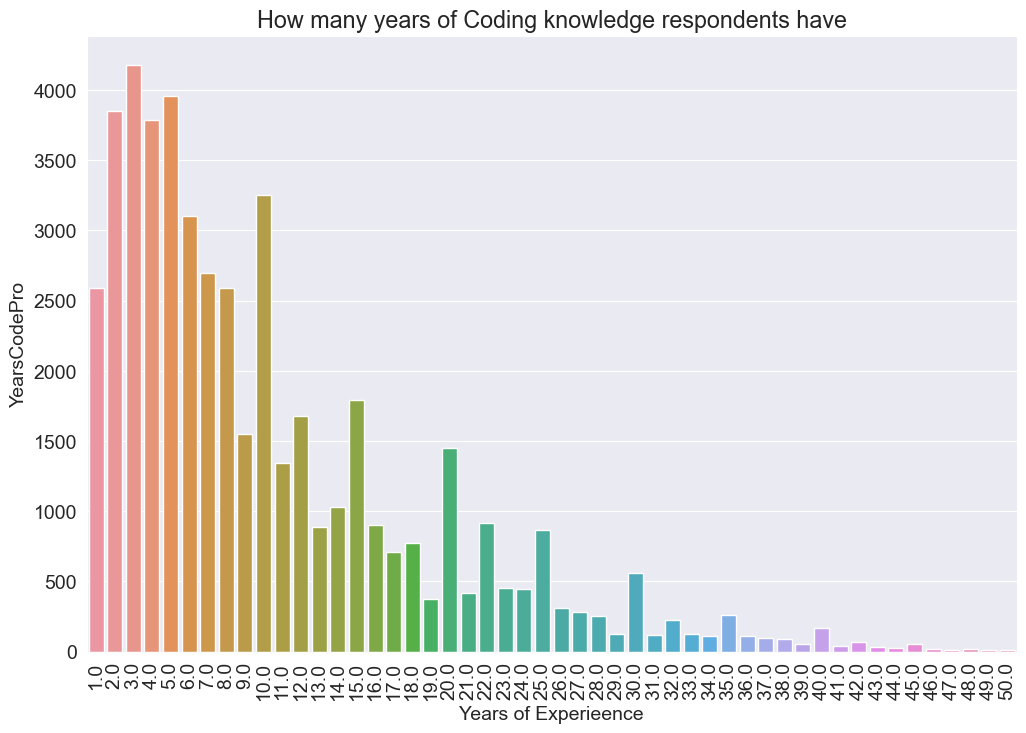

In [456]:

plt.figure(figsize=(12,8))

plt.xlabel("Years of Experieence")
plt.ylabel("Number of Responses")
plt.title("How many years of Coding Professionally")
plt.xticks(rotation = 90)
sns.barplot(x = years_code_pro_count.index,y = years_code_pro_count)

## Inferences and Conclusion

This was an basic and simple Data Analysis of mine on the developer survey data 2022.From this analysis,I was able to get a glimpse in the life of the respondents of the survey. We were able to know the demographic distribution of the respondents, their ethnicities, sexualities and more. Coming to their work life, we were able to gather the what sort of technologies they use, their OS's, what programming language is popular in a particular country, languages people love and dread. 

There are some other things that can be derived from the dataset as well which I didn't look into further, but do hope to look into in the near future.

## References and Future Work

In the future, I hope to get some more information from the dataset(or future iterations of the dataset), which job profile has the most number of women in it or which profile has the most diverse group of people in it. Apart from that, I would also like to be able to derive the relation between the compensation amount provided by a company to it's employees and what sort of job role they have.

References - 
>- Jovian Data Analytics course on FreeCodeCamp Youtube channel and their Website(some of the code like the split_column func is from there)
>- StackOverflow survey 2022 dataset from https://insights.stackoverflow.com/survey